# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

from sklearn.metrics import  roc_curve,auc,make_scorer,confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error,accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold,KFold, GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler,label_binarize
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz,DecisionTreeRegressor

from IPython.display import Image
from IPython.display import display

from graphviz import Source
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

import xgboost as xgb
from xgboost import XGBClassifier
import multiprocessing
from xgboost import to_graphviz


In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.head(15)

ID Subject school sex  age address famsize Pstatus Medu Fedu  \
0   100097     Por     GP   F   16       U     GT3       A    3    4   
1   101021     Por     GP   F   17       U     GT3       T    3    2   
2   102965     Por     GP   M   16       U     LE3       T    1    2   
3   102989     Por     MS   M   17       U     GT3       T    2    3   
4   103131     Por     GP   F   16       U     GT3       T    1    1   
5   103144     Por     GP   M   18       U     LE3       T    3    1   
6   105257     Por     MS   F   18       U     GT3       T    1    1   
7   107639     Por     MS   F   15       R     GT3       T    4    4   
8   107914    Math     GP   F   15       U     LE3       T    3    2   
9   108089     Por     MS   M   16       R     GT3       T    3    4   
10  108254     Por     GP   M   15       U     LE3       T    4    4   
11  108296     Por     GP   M   18       U     LE3       T    3    4   
12  108753    Math     MS   F   18       R     GT3       T    4    4   
13  108825     Por     GP   M   15       U     GT3       T    4    3   
14  114462    Math     GP   F   16       U     LE3       T    2    2   

        Mjob      Fjob      reason guardian  traveltime  studytime  failures  \
0   services     other      course   father           1          1         0   
1      other     other      course   mother           1          2         0   
2     health  services      course   mother           2          1         2   
3      other  services        home   father           2          2         0   
4    at_home     other        home   mother           2          1         0   
5   services  services      course   mother           2          1         0   
6      other     other      course   mother           2          2         0   
7    teacher     other      course   mother           2          1         0   
8   services     other  reputation   mother           1          2         0   
9      other    health       other   mother           3          2         0   
10    health  services      course   father           1          1         0   
11  services     other        home   mother           1          2         0   
12   teacher   at-home  reputation   mother           3          1         0   
13   teacher     other        home   mother           1          2         0   
14   at_home     other      course   mother           1          2         0   

   schoolsup famsup paid activities nursery higher internet romantic  famrel  \
0         no     no   no         no     yes    yes      yes       no     3.0   
1         no     no   no        yes      no    yes      yes       no     5.0   
2         no     no   no         no      no    yes      yes       no     4.0   
3         no     no   no        yes     yes    yes      yes       no     4.0   
4         no    yes   no         no     yes    yes       no      NaN     4.0   
5         no     no   no        yes     yes    yes      yes      yes     3.0   
6         no     no   no        yes     yes    yes       no       no     1.0   
7         no     no   no         no     yes    yes      yes      yes     1.0   
8         no    yes  yes         no     yes    yes      yes       no     4.0   
9         no     no   no         no      no    yes       no       no     3.0   
10        no    yes   no        yes     yes    yes      yes       no     4.0   
11        no     no   no        yes     yes    yes      yes      yes     4.0   
12        no    yes  yes        yes     yes    yes      yes      yes     4.0   
13        no    yes   no        yes     yes    yes      yes       no     4.0   
14        no    yes   no         no     yes    yes       no       no     4.0   

    freetime  goout  Dalc  Walc  health  absences cheating  G1  G2  G3  
0          2      1   1.0   4.0       5        12      NaN  15  13  14  
1          3      4   1.0   3.0       3         2      NaN  17  18  17  
2          4      5   3.0   5.0       5         0      yes   9   8  10  
3

### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

Признак  \
0           ID   
1      Subject   
2       school   
3          sex   
4          age   
5      address   
6      famsize   
7      Pstatus   
8         Medu   
9         Fedu   
10        Mjob   
11        Fjob   
12      reason   
13    guardian   
14  traveltime   
15   studytime   
16    failures   
17   schoolsup   
18      famsup   
19        paid   
20  activities   
21     nursery   
22      higher   
23    internet   
24    romantic   
25      famrel   
26    freetime   
27       goout   
28        Dalc   
29        Walc   
30      health   
31    absences   
32    cheating   
33          G1   
34          G2   
35          G3   

                                                                                                                                                                              Описание  
0                                                                                                                                                          Уникальный номер наблюдения  
1                                                                                                                             Предмет: 'Math' - математика, 'Por' - португальский язык  
2                                                                                                                           Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira  
3                                                                                                                                           Пол студента: 'F' - женский, 'M' - мужской  
4                                                                                                                                                                     Возраст студента  
5                                                                                                                          Место проживания студента: 'U' - в городе, 'R' - за городом  
6                                                                                                                              Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3  
7                                                                                                                       Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно  
8                                                 Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование  
9                                                   Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование  
10  Работа матери: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое  
11    Работа отца: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое  
12                                Причина, по которой студент выбрал данную школу: 'home' - рядом с домом, 'reputation' - репутация школы, 'course' - читаемые курсы, 'other' - другое  
13                                                                                                                Опекун студента (student's guardian): 'mother', 'father' или 'other'  
14                                                                             Время в пути от дома до школы: 1 - < 15 мин, 2 - от 15 до 30 мин, 3 - от 30 мин до 1 часа, 4 - > 1 часа  
15                                                                        Количество часов на учебу в неделю: 1 - < 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, 4 - > 10 часов  
16                                                                                                                Число завалов студента по предыдущим курсам:  n если 0<=n<3, иначе 3  
17        

## Часть 1. Предобработка данных

#### Поиск и замена ошибок, первые исправления

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [6]:
for column in data.columns.tolist(): print(column, " | ", data[column].unique())

ID  |  [100097 101021 102965 ... 998425 999143 999194]
Subject  |  ['Por' 'Math']
school  |  ['GP' 'MS']
sex  |  ['F' 'M' 'm']
age  |  [16 17 18 15 19 21 20 22]
address  |  ['U' 'R']
famsize  |  ['GT3' 'LE3']
Pstatus  |  ['A' 'T' 't']
Medu  |  ['3' '1' '2' '4' '0' 'o']
Fedu  |  ['4' '2' '3' '1' 'o' '0']
Mjob  |  ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob  |  ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason  |  ['course' 'home' 'reputation' 'other']
guardian  |  ['father' 'mother' 'other' 'futher']
traveltime  |  [1 2 3 4]
studytime  |  [1 2 4 3]
failures  |  [0 2 1 3]
schoolsup  |  ['no' 'yes']
famsup  |  ['no' 'yes']
paid  |  ['no' 'yes']
activities  |  ['no' 'yes']
nursery  |  ['yes' 'no']
higher  |  ['yes' 'no']
internet  |  ['yes' 'no']
romantic  |  ['no' nan 'yes']
famrel  |  [ 3.  5.  4.  1.  2. nan]
freetime  |  [2 3 4 1 5]
goout  |  [1 4 5 3 2]
Dalc  |  [ 1.  3.  4.  2.  5. nan]
Walc  |  [ 4.  3.  5.  1.  2. nan]
health  |  [5 3 4 2 1]
ab

Среди представленных данных лишним является ID, так как он нам попросту не нужен. Я решил его просто удалить


Ошибки и опечатки в данных:
1. Sex (m вместо M) 
2. Pstatus (t вместо T)
3. Medu (o вместо 0)
4. Fedu (o вместо 0)
5. Mjob (at-home вместо at_home)
6. Guardian (futher вместо father)
7. Famrel (присутствуют Nan)
8. Dalc (присутствуют Nan)
9. Walc (присутствуют Nan)
10. Romantic (присутствуют Nan)
11. Cheating (присутствуют Nan)

В колонке cheating больше Nan-значений чем всех остальных, так что я принял решение заменить все пустые значениея на 'no' (не пойман - не вор)

In [7]:
data.drop(["ID"], axis = 1, inplace = True)

data.sex.replace("M", "m", inplace=True)
data.Medu.replace("o", "0", inplace=True)
data.Fedu.replace("o", "0", inplace=True)
data.Pstatus.replace("t", "T", inplace=True)
data.replace("at-home", "at_home", inplace=True)
data.guardian.replace("futher", "father", inplace=True)

data.dropna(subset = ['romantic',"famrel","Dalc","Walc"], inplace = True)
data.cheating.fillna('no', inplace=True)

#### Поиск ненужных данных

In [8]:
print(data['Fjob'].value_counts(),'\n')
print(data['Mjob'].value_counts())

other       557
services    285
at_home      62
teacher      61
health       39
Name: Fjob, dtype: int64 

other       387
services    229
at_home     187
teacher     121
health       80
Name: Mjob, dtype: int64


В графах колонках Mjob и Fjob ничего не дающее нам значение 'other' встречается чаще всего. Следовательно данные от этих колонок не принесут нам пользы и их можно удалиить.

In [9]:
data = data.drop(["Fjob", "Mjob"], axis=1)

#### Настройка типов данных

In [10]:
print(data.dtypes)

Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object


Неверными типами данных являются:
1. Medu, Fedu, famrel, Dalc и Walc (object вместо integer)

In [11]:
data['Medu'] = data['Medu'].apply(pd.to_numeric, errors='coerce',downcast='integer')
data['Fedu'] = data['Fedu'].apply(pd.to_numeric, errors='coerce',downcast='integer')
data['famrel'] = data.famrel.astype('int64')
data['Dalc'] = data.Dalc.astype('int64')
data['Walc'] = data.Walc.astype('int64')

#### Проверка корреляций

In [12]:
abs(data.corr()['G3'])

age           0.117976
Medu          0.207814
Fedu          0.164776
traveltime    0.112519
studytime     0.158775
failures      0.382542
famrel        0.052474
freetime      0.057242
goout         0.092770
Dalc          0.125858
Walc          0.110614
health        0.070054
absences      0.043690
G1            0.807610
G2            0.910560
G3            1.000000
Name: G3, dtype: float64

Основной критерий оценки G3 почти не зависит от таких данных,как:
1. Sex
2. Pstatus
3. Famsup
4. Activities
5. Nursery
6. Goout
7. Health
8. Schoolsup
9. Freetime
10. Famsize
11. Famrel
12. Paid

Следовательно, эти столбцы можно удалить

In [13]:
data = data.drop(["sex","Pstatus","activities", "famsup", 
                  "nursery", "freetime","goout", "schoolsup",
                  "health", "famsize", "famrel", "paid"], axis=1)

### Представление данных в двоичной и чесленной формах

#### Первые преобразования

In [14]:
data.replace("no", 0, inplace=True)
data.replace("yes", 1, inplace=True)

#### Столбцы, где возможны лишь 2 значения можно представляем как бинарный дата сет 

In [15]:
bin_sex = {"sex": {"M": 1, "F": 0}}
data.replace(bin_sex, inplace=True)

lg_3 = {"famsize": {"LE3": 0, "GT3": 1}}
data.replace(lg_3, inplace=True)

bin_pstat = {"Pstatus": {"A": 0, "T": 1}}
data.replace(bin_pstat, inplace=True)

bin_addr = {"address": {"R": 0, "U": 1}}
data.replace(bin_addr, inplace=True)

bin_sch = {"school": {"GP": 0, "MS": 1}}
data.replace(bin_sch, inplace=True)

bin_sub = {"Subject": {"Por": 0, "Math": 1}}
data.replace(bin_sub, inplace=True)

#### Далее все остальные столбцы переводим в численный вид

In [16]:
numerical = data.select_dtypes(exclude=['object'])
categorical = data.select_dtypes(include=['object'])

onehot = pd.get_dummies(categorical)

df = pd.concat([numerical, onehot], axis=1)

#### Разделяем выборки

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(["G2", "G3"], axis=1) # с использованием G1
y = df["G3"]

#### Приводим к стандартному типу

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train))
print(len(X_test))

803
201


### Результат

In [19]:
df.head(10)

Subject  school  age  address  Medu  Fedu  traveltime  studytime  \
0         0       0   16        1     3     4           1          1   
1         0       0   17        1     3     2           1          2   
2         0       0   16        1     1     2           2          1   
3         0       1   17        1     2     3           2          2   
5         0       0   18        1     3     1           2          1   
6         0       1   18        1     1     1           2          2   
7         0       1   15        0     4     4           2          1   
8         1       0   15        1     3     2           1          2   
9         0       1   16        0     3     4           3          2   
10        0       0   15        1     4     4           1          1   

    failures  higher  internet  romantic  Dalc  Walc  absences  cheating  G1  \
0          0       1         1         0     1     4        12         0  15   
1          0       1         1         0     1     3         2         0  17   
2          2       1         1         0     3     5         0         1   9   
3          0       1         1         0     1     1         4         0  14   
5          0       1         1         1     4     5         2         0  11   
6          0       1         0         0     1     1         6         0  11   
7          0       1         1         1     3     5         0         0  13   
8          0       1         1         0     1     1        10         0   7   
9          0       1         0         0     1     2         4         0   9   
10         0       1         1         0     1     3         0         0  12   

    G2  G3  reason_course  reason_home  reason_other  reason_reputation  \
0   13  14              1            0             0                  0   
1   18  17              1            0             0                  0   
2    8  10              1            0             0                  0   
3   15  16              0            1             0                  0   
5   11  12              1            0             0                  0   
6   12   9              1            0             0                  0   
7   14  14              1            0             0                  0   
8    6   6              0            0             0                  1   
9   10  11              0            0             1                  0   
10  13  12              1            0             0                  0   

    guardian_father  guardian_mother  guardian_other  
0                 1                0               0  
1                 0                1               0  
2                 0                1               0  
3                 1                0               0  
5                 0                1               0  
6                 0                1               0  
7                 0                1               0  
8                 0                1               0  
9                 0                1               0  
10                1                0               0

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

## Вариант 1

### Функция подсчета

In [20]:
def compute_metrics(y_test, y_pred,y_train,y_train_pred):
    print("----------------Test:--------------------")
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('R2:', r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print("----------------Train:-------------------")
    print('MSE:', mean_squared_error(y_train, y_train_pred))
    print('MAE:', mean_absolute_error(y_train, y_train_pred))
    print('R2:', r2_score(y_train, y_train_pred))
    print('MAPE:', mean_absolute_percentage_error(y_train,y_train_pred))

### Регрессия с поставленной задачей

In [21]:
skfold = StratifiedKFold(n_splits=5, shuffle=True) 
ridge = Ridge(alpha=0.01, max_iter=100000).fit(X_train, y_train) 

print("RIDGE REGRESSION") 
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(ridge, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))

RIDGE REGRESSION
Training set score: 0.70
Test set score: 0.61
Mean Cross-Validation, Kfold: 0.68


----------------Test:--------------------
MSE: 4.768337669602305
MAE: 1.445597599150864
R2: 0.6106045515946017
MAPE: 1088585491400688.2
----------------Train:-------------------
MSE: 4.743021821514543
MAE: 1.4852683165869531
R2: 0.6964883978182792
MAPE: 1643934086540848.5
{'alpha': 100.0} 0.6810876164282902


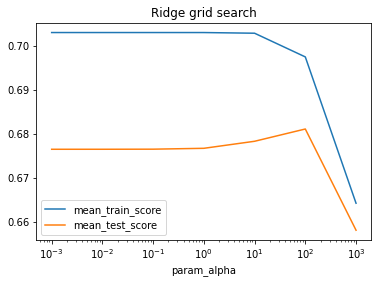

In [22]:
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=skfold,scoring = 'explained_variance', return_train_score=True)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_train_pred = grid.predict(X_train)
compute_metrics(y_test, y_pred,y_train, y_train_pred)
res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search")
print(grid.best_params_, grid.best_score_)

### Линейная регрессия

In [23]:
lr = LinearRegression().fit(X_train, y_train) # Fit the training data to a regression line

print("LINEAR REGRESSION")
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(lr, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))

LINEAR REGRESSION
Training set score: 0.70
Test set score: 0.61
Mean Cross-Validation, Kfold: 0.68


----------------Test:--------------------
MSE: 4.812075782850439
MAE: 1.4784864907872497
R2: 0.6070327780750298
MAPE: 1060023683913265.0
----------------Train:-------------------
MSE: 4.683259876068207
MAE: 1.4979119745874456
R2: 0.7003126357186062
MAPE: 1573440101455072.5


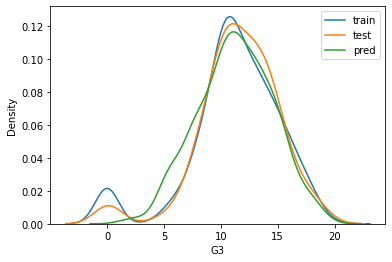

In [24]:
regressionModel = LinearRegression()
regressionModel.fit(X_train, y_train)
predictedDependentVariables = regressionModel.predict(X_train)

compute_metrics(y_test, regressionModel.predict(X_test),y_train,predictedDependentVariables)
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(predictedDependentVariables, label='pred')
plt.legend()
plt.show()

### Полиномиальная регрессия

Original number of features: 24
Number of features after polynomial transformation: 324
----------------Test:--------------------
MSE: 6.200194822133181
MAE: 1.8851287993625623
R2: 0.49367519453236586
MAPE: 821646987753563.8
----------------Train:-------------------
MSE: 2.553831936288184
MAE: 1.2290360580197306
R2: 0.8365772598452514
MAPE: 788633957492432.5


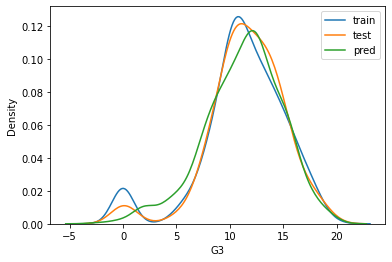

In [25]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

regressionModel = LinearRegression(normalize=True)
regressionModel.fit(poly_train, y_train)

compute_metrics(y_test, regressionModel.predict(poly_test),y_train,regressionModel.predict(poly_train))

sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(regressionModel.predict(poly_train), label='pred')
plt.legend()

Original number of features: 24
Number of features after polynomial transformation: 324
----------------Test:--------------------
MSE: 4.757028846223924
MAE: 1.4323426748037655
R2: 0.6115280609296126
MAPE: 1125466777819901.1
----------------Train:-------------------
MSE: 4.332524216805756
MAE: 1.408568166571877
R2: 0.7227566273110835
MAPE: 1588217850088481.8


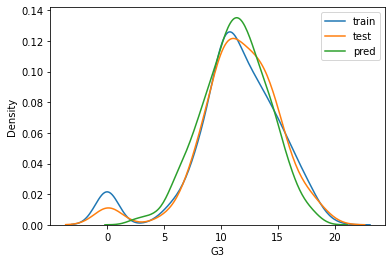

In [26]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

regressionModel = Ridge(normalize=True)
regressionModel.fit(poly_train, y_train)

compute_metrics(y_test, regressionModel.predict(poly_test),y_train,regressionModel.predict(poly_train))

sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(regressionModel.predict(poly_train), label='pred')
plt.legend()
plt.show()

Original number of features: 24
Number of features after polynomial transformation: 2924
----------------Test:--------------------
MSE: 4.783379717446736
MAE: 1.5019297769617022
R2: 0.609376176976198
MAPE: 975783061030031.9
----------------Train:-------------------
MSE: 2.6616886530482424
MAE: 1.1664406114402686
R2: 0.8296753803806843
MAPE: 1041945140556231.6


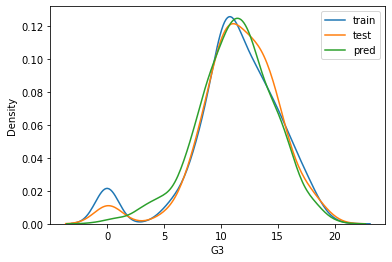

In [27]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

regressionModel = Ridge(normalize=True)
regressionModel.fit(poly_train, y_train)

compute_metrics(y_test, regressionModel.predict(poly_test),y_train,regressionModel.predict(poly_train))
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(regressionModel.predict(poly_train), label='pred')
plt.legend()
plt.show()

### KNN

In [28]:
def get_model_quality(test_label, preds):
    print("Accuracy:",
      round(sklearn.metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(sklearn.metrics.balanced_accuracy_score(test_label, preds), 5))

    print()
    print(metrics.classification_report(test_label, preds))

In [29]:
knn = KNeighborsClassifier().fit(X_train, y_train)

print("KNN CLASSIFER")
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))

KNN CLASSIFER
Training set score: 0.51
Test set score: 0.25
Mean Cross Validation, KFold: 0.43


In [30]:
knn = KNeighborsRegressor().fit(X_train, y_train)

print("KNN Regressor")
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))

KNN Regressor
Training set score: 0.79
Test set score: 0.55
Mean Cross Validation, KFold: 0.68


In [31]:
params = {
    'kneighborsregressor__n_neighbors': [1,2,3,4,5,6,7,8,9,10,15,20,50,100]
}

kf = KFold(n_splits=10, shuffle=True)
knn = KNeighborsRegressor()
scaler = StandardScaler()

knrModel = make_pipeline(
    scaler, 
    knn
)

gd = GridSearchCV(knrModel, params, cv=kf, scoring = 'explained_variance')

gd.fit(X_train, y_train)

print(gd.best_params_,gd.best_score_)


{'kneighborsregressor__n_neighbors': 15} 0.44748225578475614


----------------Test:--------------------
MSE: 7.05176340519624
MAE: 1.8461028192371478
R2: 0.4241337834104798
MAPE: 1295064967472709.8
----------------Train:-------------------
MSE: 7.7873695862736945
MAE: 1.9353258613532585
R2: 0.5016769669517562
MAPE: 2186554638510806.2


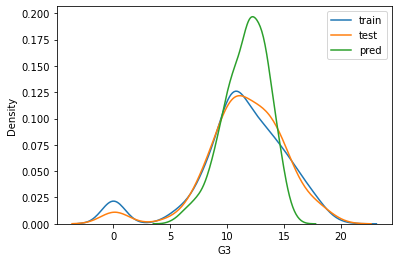

In [32]:
best = gd.best_estimator_

# best.fit(X_train_scaled, y_train)
y_pred = best.predict(X_test)
y_pred_train = best.predict(X_train)

compute_metrics(y_test, y_pred,y_train, y_pred_train)
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(y_pred_train, label='pred')
plt.legend()
plt.show()

### Random Forest

In [33]:
rf = RandomForestClassifier().fit(X_train, y_train)

print("KNN Regressor")
print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(rf, X_train, y_train, cv=skfold))))

KNN Regressor
Training set score: 1.00
Test set score: 0.30
Mean Cross Validation, KFold: 0.24


In [34]:
param = {'n_estimators': range(50, 101, 25), 'max_depth': [30], 'min_samples_split': range(2, 11, 2)}
grid = RandomizedSearchCV(RandomForestClassifier(criterion='entropy'), param, n_iter=20, cv=skfold,scoring = 'explained_variance', verbose=4)
grid.fit(X_train, y_train)
best = grid.best_estimator_
y_pred = best.predict(X_test)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.1s
[CV 2/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.1s
[CV 3/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.1s
[CV 4/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.1s
[CV 5/5] END max_depth=30, min_samples_split=2, n_estimators=75; total time=   0.1s
[CV 1/5] END max_depth=30, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV 2/5] END m

In [35]:

rf = RandomForestRegressor().fit(X_train, y_train)

print("Random Forest Regressor")
print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(rf, X_train, y_train, cv=skfold,scoring = 'explained_variance'))))

Random Forest Regressor
Training set score: 0.97
Test set score: 0.64
Mean Cross Validation, KFold: 0.76


In [36]:
params_rf = {
  'n_estimators': [50, 100, 200,300, 400, 500],
  'max_depth': [4, 6, 8],
  'min_samples_leaf': [.1, .2],
  'max_features': ['log2', 'sqrt']
}

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state = 17)
grid_rf = GridSearchCV(estimator=rf, param_grid = params_rf, cv = skfold, scoring='explained_variance', n_jobs = -1)

grid_rf.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_df'...
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 50}


In [37]:
# Extract best model from 'grid_rf'
print(grid_rf.best_score_)
best_model = grid_rf.best_estimator_

# Predict the test set labels...
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

compute_metrics(y_test, y_pred,y_train, y_train_pred)

0.4009107060718895
----------------Test:--------------------
MSE: 7.345289922370802
MAE: 1.8085965250858012
R2: 0.4001636081222024
MAPE: 1344295989669340.8
----------------Train:-------------------
MSE: 9.211431070029725
MAE: 2.044116835935773
R2: 0.41054958048696977
MAPE: 2379978673623832.0


### Деревья решений

In [38]:
params_dt = {
  'max_depth': [3, 4, 5, 6],
  'min_samples_leaf': [.04, .06, .08],
  'max_features': [.2, .4, .6, .8]
}
SEED = 1

dt = DecisionTreeClassifier(random_state=SEED)

grid_dt= GridSearchCV(estimator=dt, param_grid = params_dt, cv = skfold, n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n' , best_hyperparams)

best_score = grid_dt.best_score_
print('Best '.format(best_score))

best_model = grid_dt.best_estimator_

y_pred = best_model.predict(X_test)

Best hyperparameters:
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}
Best 


In [39]:
bag = BaggingClassifier(n_estimators=30, base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5))
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)


## Вариант 2

In [40]:
df.head()
X2 = df.drop(["G2", "G1"], axis=1) # без G1
X_m = X2[X2["Subject"] == 1].drop("G3", axis=1)
X_p = X2[X2["Subject"] == 0].drop("G3", axis=1)
y_m = X2[X2["Subject"] == 1]["G3"]
y_p = X2[X2["Subject"] == 0]["G3"]

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2)
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2)

X2.head()

Subject  school  age  address  Medu  Fedu  traveltime  studytime  failures  \
0        0       0   16        1     3     4           1          1         0   
1        0       0   17        1     3     2           1          2         0   
2        0       0   16        1     1     2           2          1         2   
3        0       1   17        1     2     3           2          2         0   
5        0       0   18        1     3     1           2          1         0   

   higher  internet  romantic  Dalc  Walc  absences  cheating  G3  \
0       1         1         0     1     4        12         0  14   
1       1         1         0     1     3         2         0  17   
2       1         1         0     3     5         0         1  10   
3       1         1         0     1     1         4         0  16   
5       1         1         1     4     5         2         0  12   

   reason_course  reason_home  reason_other  reason_reputation  \
0              1            0             0                  0   
1              1            0             0                  0   
2              1            0             0                  0   
3              0            1             0                  0   
5              1            0             0                  0   

   guardian_father  guardian_mother  guardian_other  
0                1                0               0  
1                0                1               0  
2                0                1               0  
3                1                0               0  
5                0                1               0

### Регрессия с поставленной задачей

In [41]:
print("Math",cross_val_score(Ridge(), X_m, y_m, cv=10))
print("Por",cross_val_score(Ridge(), X_p, y_p, cv=10),'\n')

param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)


grid.fit(x_train_p, y_train_p)
y_pred = grid.predict(x_test_p)
y_train_pred = grid.predict(x_train_p)
print("Por:")
compute_metrics(y_test_p, y_pred,y_train_p, y_train_pred)

grid.fit(x_train_m, y_train_m)
y_pred = grid.predict(x_test_m)
y_train_pred = grid.predict(x_train_m)
print("Math:")
compute_metrics(y_test_m, y_pred,y_train_m, y_train_pred)

Math [-0.05780868  0.18233018  0.22044334 -0.09804602  0.07871488 -0.03143592
 -0.05462595  0.18987014  0.09149413  0.06901223]
Por [ 0.35942264 -0.02830777  0.14916569  0.2091241   0.2666508   0.29710467
  0.3816725   0.28205606  0.25657534  0.41553234] 

Por:
----------------Test:--------------------
MSE: 7.635633097172792
MAE: 2.0737561071492983
R2: 0.24611536280883572
MAPE: 900853772685347.6
----------------Train:-------------------
MSE: 6.745239447449053
MAE: 1.8980247748187902
R2: 0.33706067377577076
MAPE: 861045650407211.6
Math:
----------------Test:--------------------
MSE: 12.829110365720046
MAE: 2.885762078998931
R2: 0.13149388804033058
MAPE: 1371935225086514.5
----------------Train:-------------------
MSE: 19.181825678725893
MAE: 3.378266882296548
R2: 0.15679790923445158
MAPE: 4575869731672149.0


### Lasso

In [42]:
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid  = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid.fit(x_train_p, y_train_p)
y_pred = grid.predict(x_test_p)
y_train_pred = grid.predict(x_train_p)
print("Por:")
compute_metrics(y_test_p, y_pred,y_train_p, y_train_pred)

grid.fit(x_train_m, y_train_m)
y_pred = grid.predict(x_test_m)
y_train_pred = grid.predict(x_train_m)
print("Math:")
compute_metrics(y_test_m, y_pred,y_train_m, y_train_pred)

Por:
----------------Test:--------------------
MSE: 7.6380667358729015
MAE: 2.072855185177788
R2: 0.2458750837376522
MAPE: 892827887287168.8
----------------Train:-------------------
MSE: 6.740439044582242
MAE: 1.8984402195424588
R2: 0.33753246960554395
MAPE: 859286514029252.1
Math:
----------------Test:--------------------
MSE: 12.721935586064685
MAE: 2.8911850091126836
R2: 0.13874941461428003
MAPE: 1248648198985246.0
----------------Train:-------------------
MSE: 19.06851982646425
MAE: 3.3723273034088828
R2: 0.16177865158521487
MAPE: 4469352519049500.5


### Линейная регрессия

In [43]:
print("Math",cross_val_score(LinearRegression(), X_m, y_m, cv=10))
print("Por",cross_val_score(LinearRegression(), X_p, y_p, cv=10),'\n')

regressionModel = LinearRegression()
regressionModel.fit(x_train_p, y_train_p)
y_pred = regressionModel.predict(x_test_p)
y_train_pred = regressionModel.predict(x_train_p)
print("Por:")
compute_metrics(y_test_p, y_pred,y_train_p, y_train_pred)

regressionModel.fit(x_train_m, y_train_m)
y_pred = regressionModel.predict(x_test_m)
y_train_pred = regressionModel.predict(x_train_m)
print("Math:")
compute_metrics(y_test_m, y_pred,y_train_m, y_train_pred)

Math [-0.06190609  0.17936302  0.22068767 -0.09751809  0.07843602 -0.03929857
 -0.05718874  0.18952729  0.08905575  0.06847814]
Por [ 0.35883023 -0.0298274   0.14938093  0.20869035  0.26603747  0.29620211
  0.38178945  0.28134944  0.25411165  0.41702504] 

Por:
----------------Test:--------------------
MSE: 7.668426841974289
MAE: 2.0928400834801275
R2: 0.24287755658017218
MAPE: 877327672781709.2
----------------Train:-------------------
MSE: 6.7333216993943585
MAE: 1.898222858131846
R2: 0.33823198043241975
MAPE: 852294373070864.4
Math:
----------------Test:--------------------
MSE: 12.934201090126125
MAE: 2.8605926528818397
R2: 0.124379448000838
MAPE: 1137684527958855.2
----------------Train:-------------------
MSE: 18.556170100347806
MAE: 3.348896622300479
R2: 0.18430071843642593
MAPE: 4207908074684901.0


### KNN

In [44]:
print("Math",cross_val_score(KNeighborsRegressor(), X_m, y_m, cv=10))
print("Por",cross_val_score(KNeighborsRegressor(), X_p, y_p, cv=10), '\n')

parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['manhattan', 'minkowski', 'euclidean'], 'n_neighbors': range(3, 9)}
estimator = KNeighborsRegressor()
model = GridSearchCV(estimator, parameters, cv=10, n_jobs = -1)
model.fit(x_train_p, y_train_p)
print("Por")
print(model.best_score_)
model.fit(x_train_m, y_train_m)
print("Math")
print(model.best_score_)

Math [-0.53996313  0.0596579   0.13306379 -0.35613547  0.17596005  0.25025721
  0.01282075  0.13238227  0.00557193  0.32255306]
Por [ 0.16719825 -0.19109088  0.06528138  0.02800585  0.23355527  0.16298919
  0.05956046  0.10489314  0.22557585  0.23680717] 

Por
0.13639783455398433
Math
0.15813884166276598


### Дерево решений

In [45]:
print("Math",cross_val_score(DecisionTreeRegressor(random_state=17), X_m, y_m, cv=10))
print("Por",cross_val_score(DecisionTreeRegressor(random_state=17), X_p, y_p, cv=10))

parameters = {'max_depth': range(2, 6)}
tree = DecisionTreeRegressor(random_state=17)
model = GridSearchCV(tree, parameters, cv=10, n_jobs = -1)
model.fit(x_train_p, y_train_p)
print("Por")
print(model.best_score_)
model.fit(x_train_m, y_train_m)
print("Math")
print(model.best_score_)

Math [-0.69205069  0.17691525 -0.58241069 -0.53595453 -0.32746986 -0.159511
 -0.89382449 -0.72134774 -1.01419636  0.18394732]
Por [-0.07544211 -0.46122196 -0.99265385 -0.48275932 -0.14356318 -1.3562546
 -0.27450489 -0.64451071 -0.02933437 -0.18071694]
Por
0.1904145175411061
Math
0.2011171969270838


### Итоги

В первом варианте(с G1) точность выше и результаты лучше

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [46]:
bin_df = df.copy()
for index, row in bin_df.iterrows():
    if (bin_df.at[index, 'G3'] < 8):
        bin_df.at[index, 'G3'] = 0
    else:
        bin_df.at[index, 'G3'] = 1

bin_df.head() 

Subject  school  age  address  Medu  Fedu  traveltime  studytime  failures  \
0        0       0   16        1     3     4           1          1         0   
1        0       0   17        1     3     2           1          2         0   
2        0       0   16        1     1     2           2          1         2   
3        0       1   17        1     2     3           2          2         0   
5        0       0   18        1     3     1           2          1         0   

   higher  internet  romantic  Dalc  Walc  absences  cheating  G1  G2  G3  \
0       1         1         0     1     4        12         0  15  13   1   
1       1         1         0     1     3         2         0  17  18   1   
2       1         1         0     3     5         0         1   9   8   1   
3       1         1         0     1     1         4         0  14  15   1   
5       1         1         1     4     5         2         0  11  11   1   

   reason_course  reason_home  reason_other  reason_reputation  \
0              1            0             0                  0   
1              1            0             0                  0   
2              1            0             0                  0   
3              0            1             0                  0   
5              1            0             0                  0   

   guardian_father  guardian_mother  guardian_other  
0                1                0               0  
1                0                1               0  
2                0                1               0  
3                1                0               0  
5                0                1               0

In [47]:
X = bin_df.drop(["G1", "G2", "G3"], axis = 1)
y =bin_df["G3"]
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 17, stratify=y)
X.head()

Subject  school  age  address  Medu  Fedu  traveltime  studytime  failures  \
0        0       0   16        1     3     4           1          1         0   
1        0       0   17        1     3     2           1          2         0   
2        0       0   16        1     1     2           2          1         2   
3        0       1   17        1     2     3           2          2         0   
5        0       0   18        1     3     1           2          1         0   

   higher  internet  romantic  Dalc  Walc  absences  cheating  reason_course  \
0       1         1         0     1     4        12         0              1   
1       1         1         0     1     3         2         0              1   
2       1         1         0     3     5         0         1              1   
3       1         1         0     1     1         4         0              0   
5       1         1         1     4     5         2         0              1   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0             0                  0                1   
1            0             0                  0                0   
2            0             0                  0                0   
3            1             0                  0                1   
5            0             0                  0                0   

   guardian_mother  guardian_other  
0                0               0  
1                1               0  
2                1               0  
3                0               0  
5                1               0

In [48]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.902864
0    0.097136
Name: G3, dtype: float64
1    0.900498
0    0.099502
Name: G3, dtype: float64


In [49]:
cvs = cross_val_score(DecisionTreeClassifier(random_state=17), X, y, cv=5)
print(cvs)
print("\n\n", cvs.mean())

[0.87064677 0.88059701 0.8358209  0.87562189 0.845     ]


 0.8615373134328358


In [50]:
model = DecisionTreeClassifier(max_depth = 5, random_state=17).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:, 1]))
model

0.6328729281767956


DecisionTreeClassifier(max_depth=5, random_state=17)

Best hyperparameters:
 {'max_depth': 5, 'max_features': 0.6, 'min_samples_leaf': 0.04}
Best  0.912802795031056


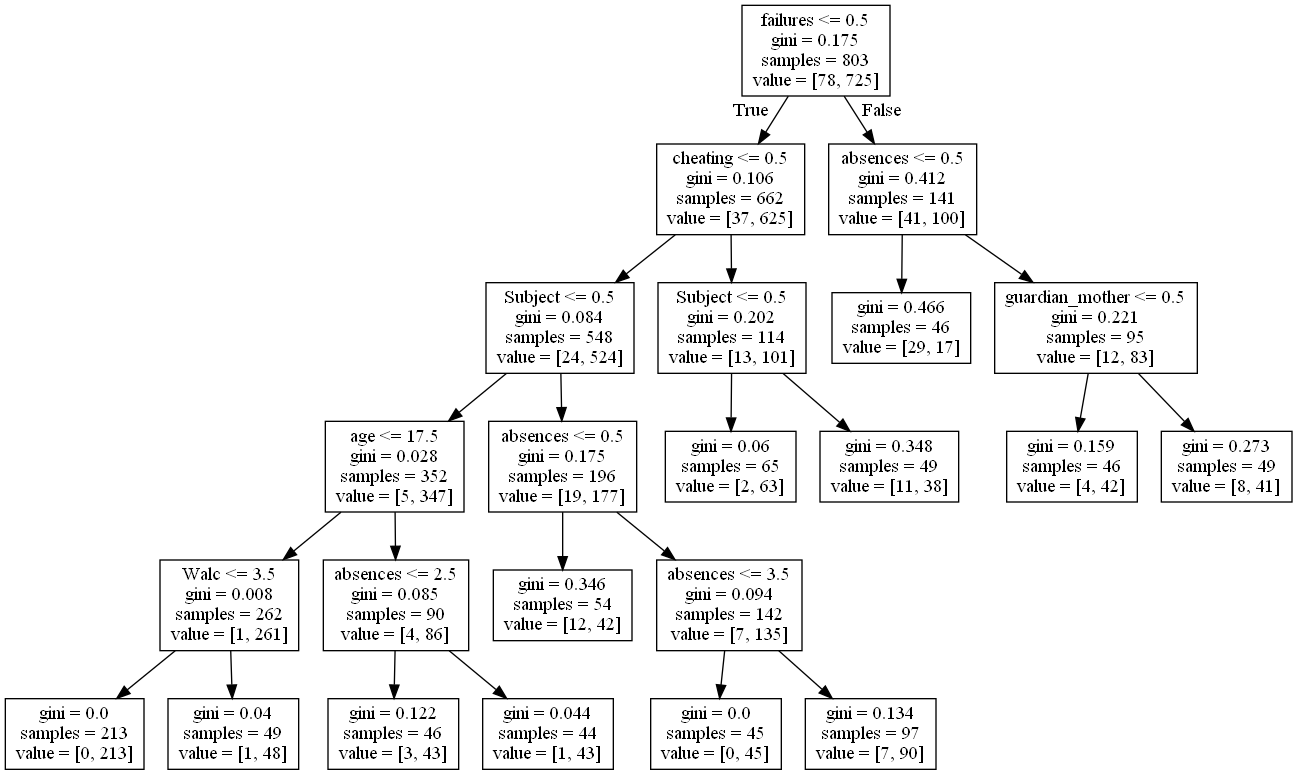

In [51]:
params_dt = {
  'max_depth': [5],
  'min_samples_leaf': [.04, .06, .08],
  'max_features': [.2, .4, .6, .8]
}
SEED = 1

dt = DecisionTreeClassifier(random_state=SEED)

grid_dt= GridSearchCV(estimator=dt, param_grid = params_dt, cv = 5, n_jobs=-1)

# Fitting the grid_dt...
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n' , best_hyperparams)

# Extract best CV score from 'gird_dt'
best_score = grid_dt.best_score_
print('Best ',(best_score))

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

graph = Source(export_graphviz(best_model, out_file=None, feature_names=feature_names))
png = graph.pipe(format='png')
Image(png)

#### Описание работы:
1. Деление по наличию предыдущих провалов экзаменов
2. У тех, кто проваливал - по предмету, а для не проваливавших - по пропускам
3. Провалы <1 и изучают математику - по дозе алкоголя
4. Провалы <1 и изучают португальский  - по пропускам
5. Провалов >0 и есть пропуски - достигли листа
6. Провалов >0 и нет пропускоы - по образованию матери

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

0.8495920398009951
Train: 0.9414694894146949
Test: 0.8905472636815921


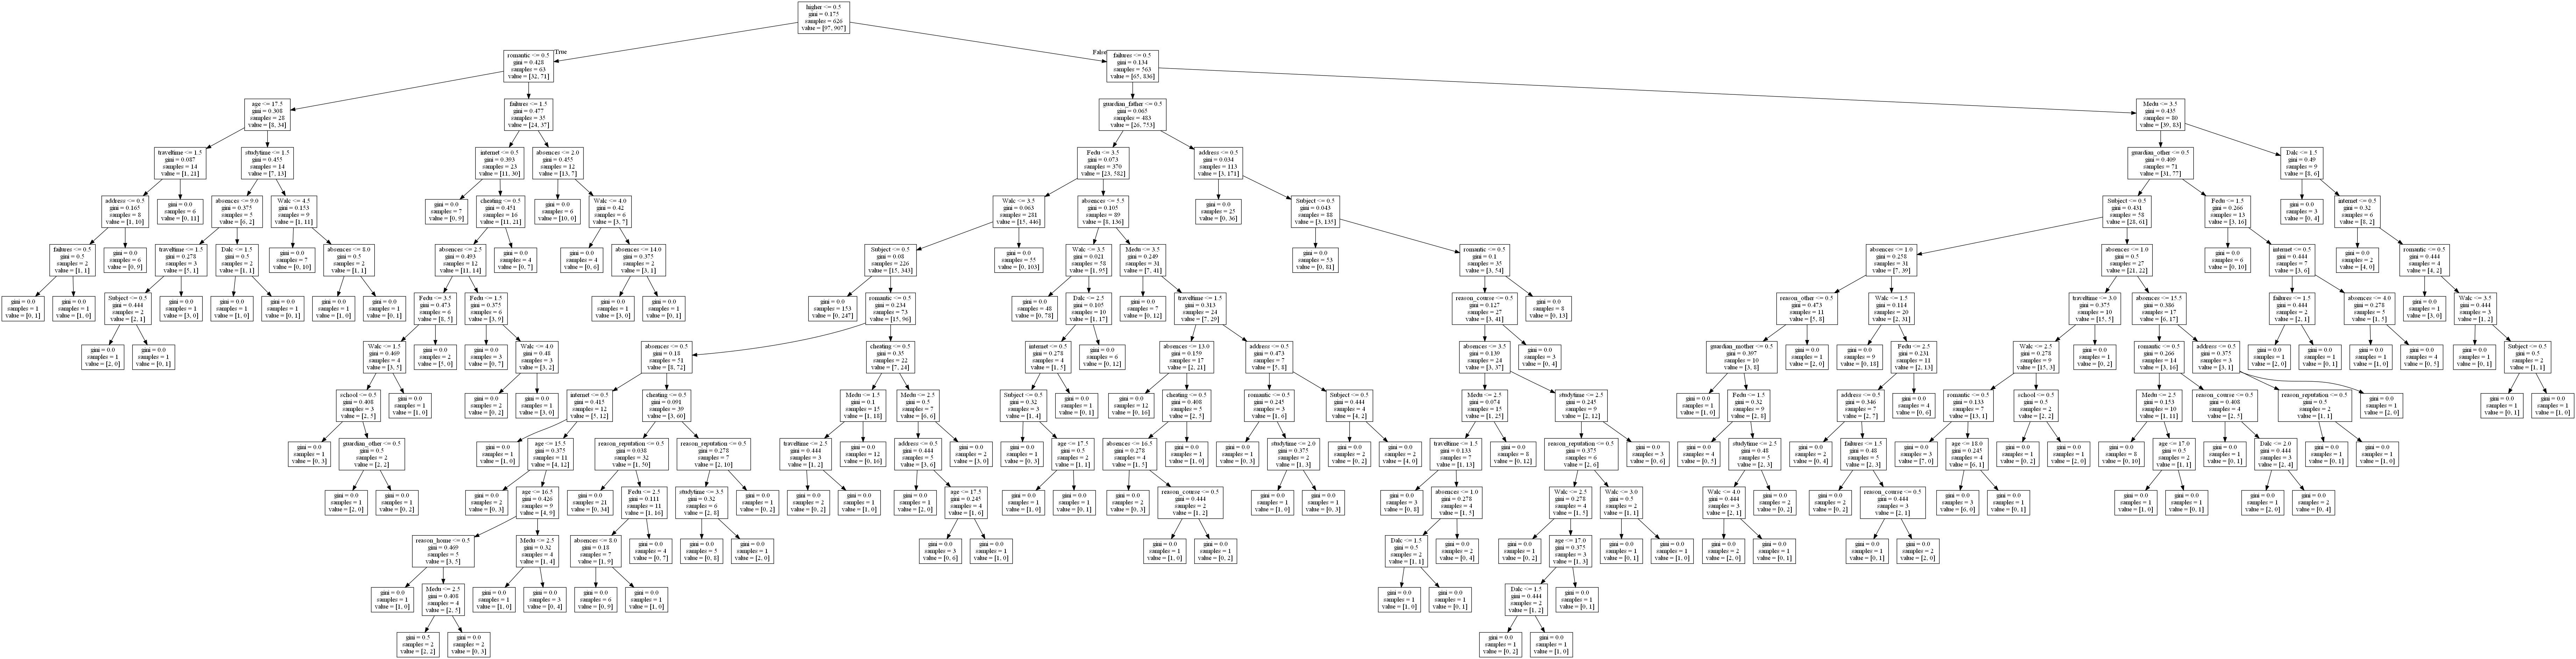

0.7927860696517414
Train: 0.9526774595267746
Test: 0.9154228855721394


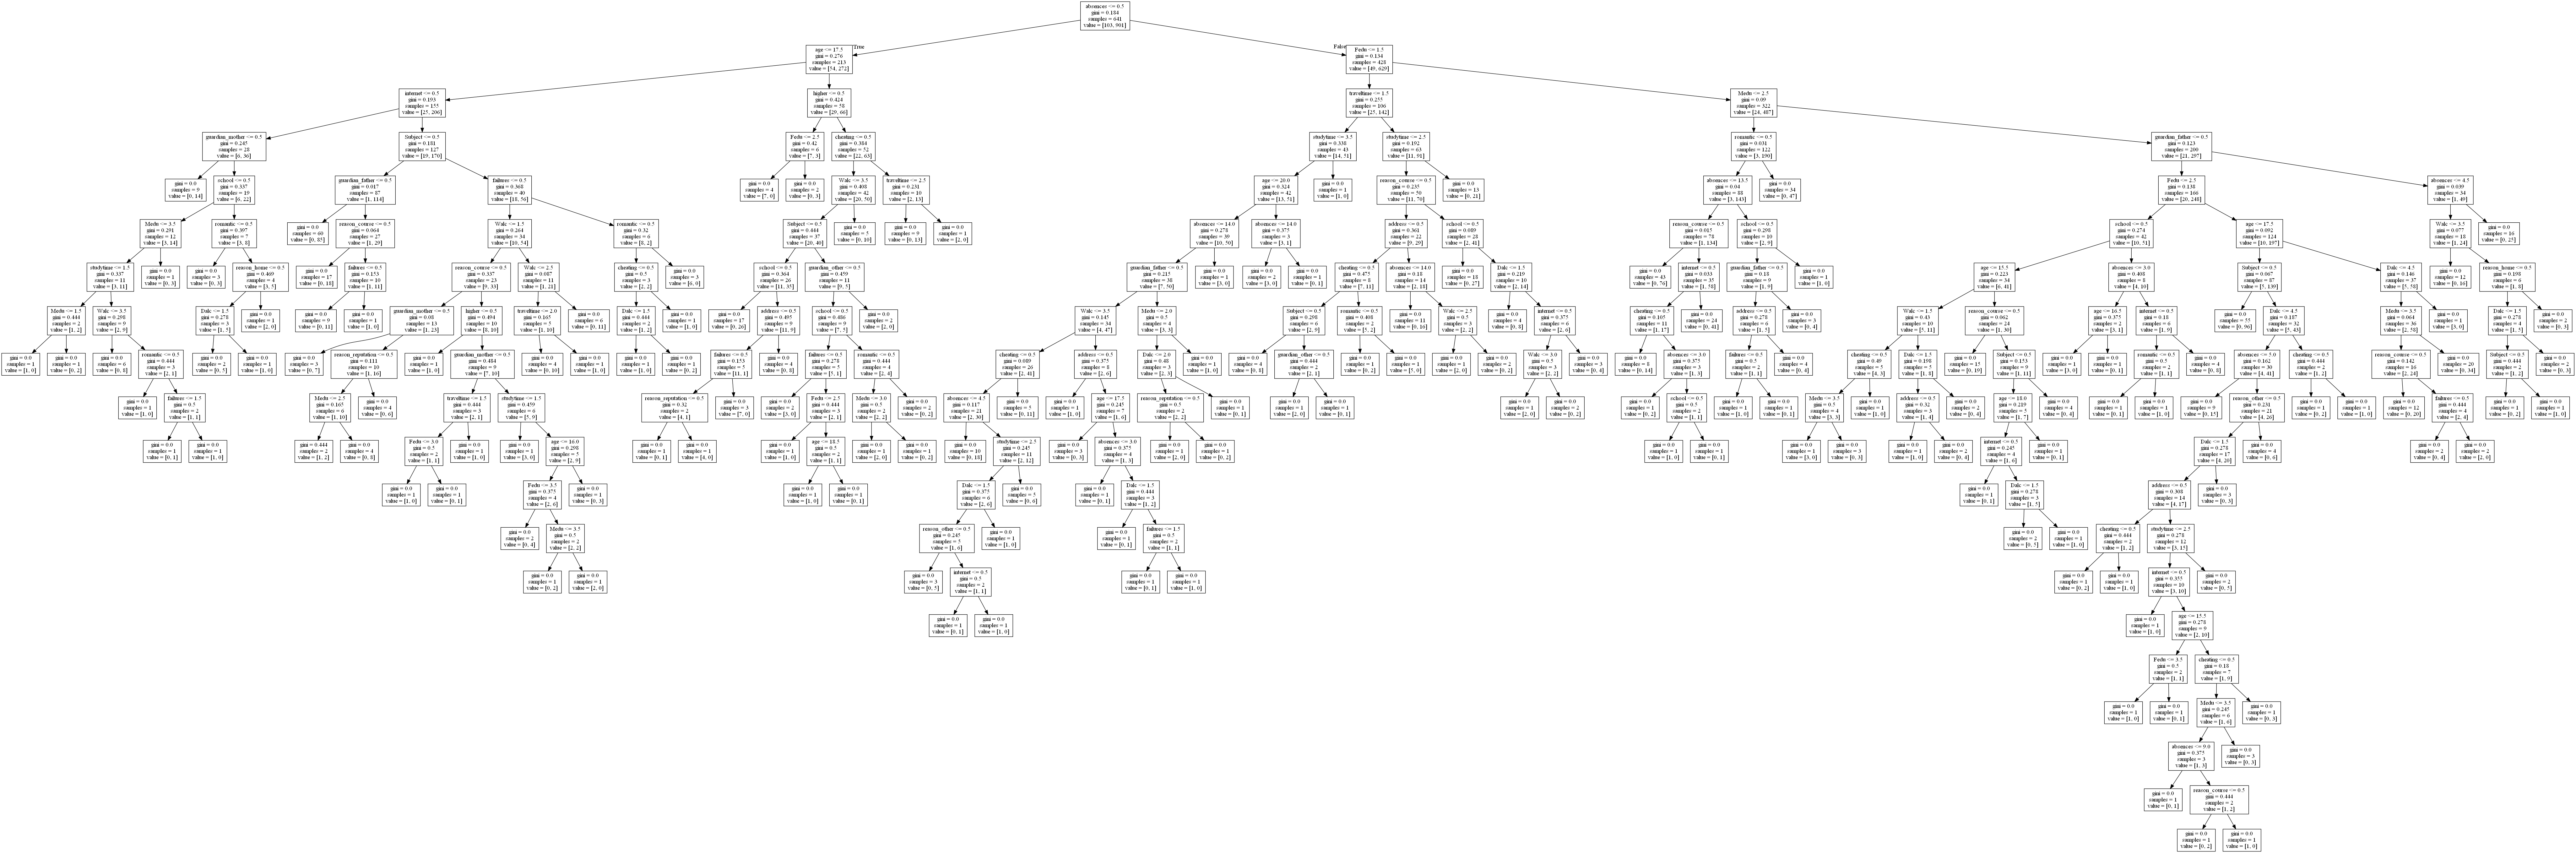

0.8814626865671642
Train: 0.9352428393524284
Test: 0.9402985074626866


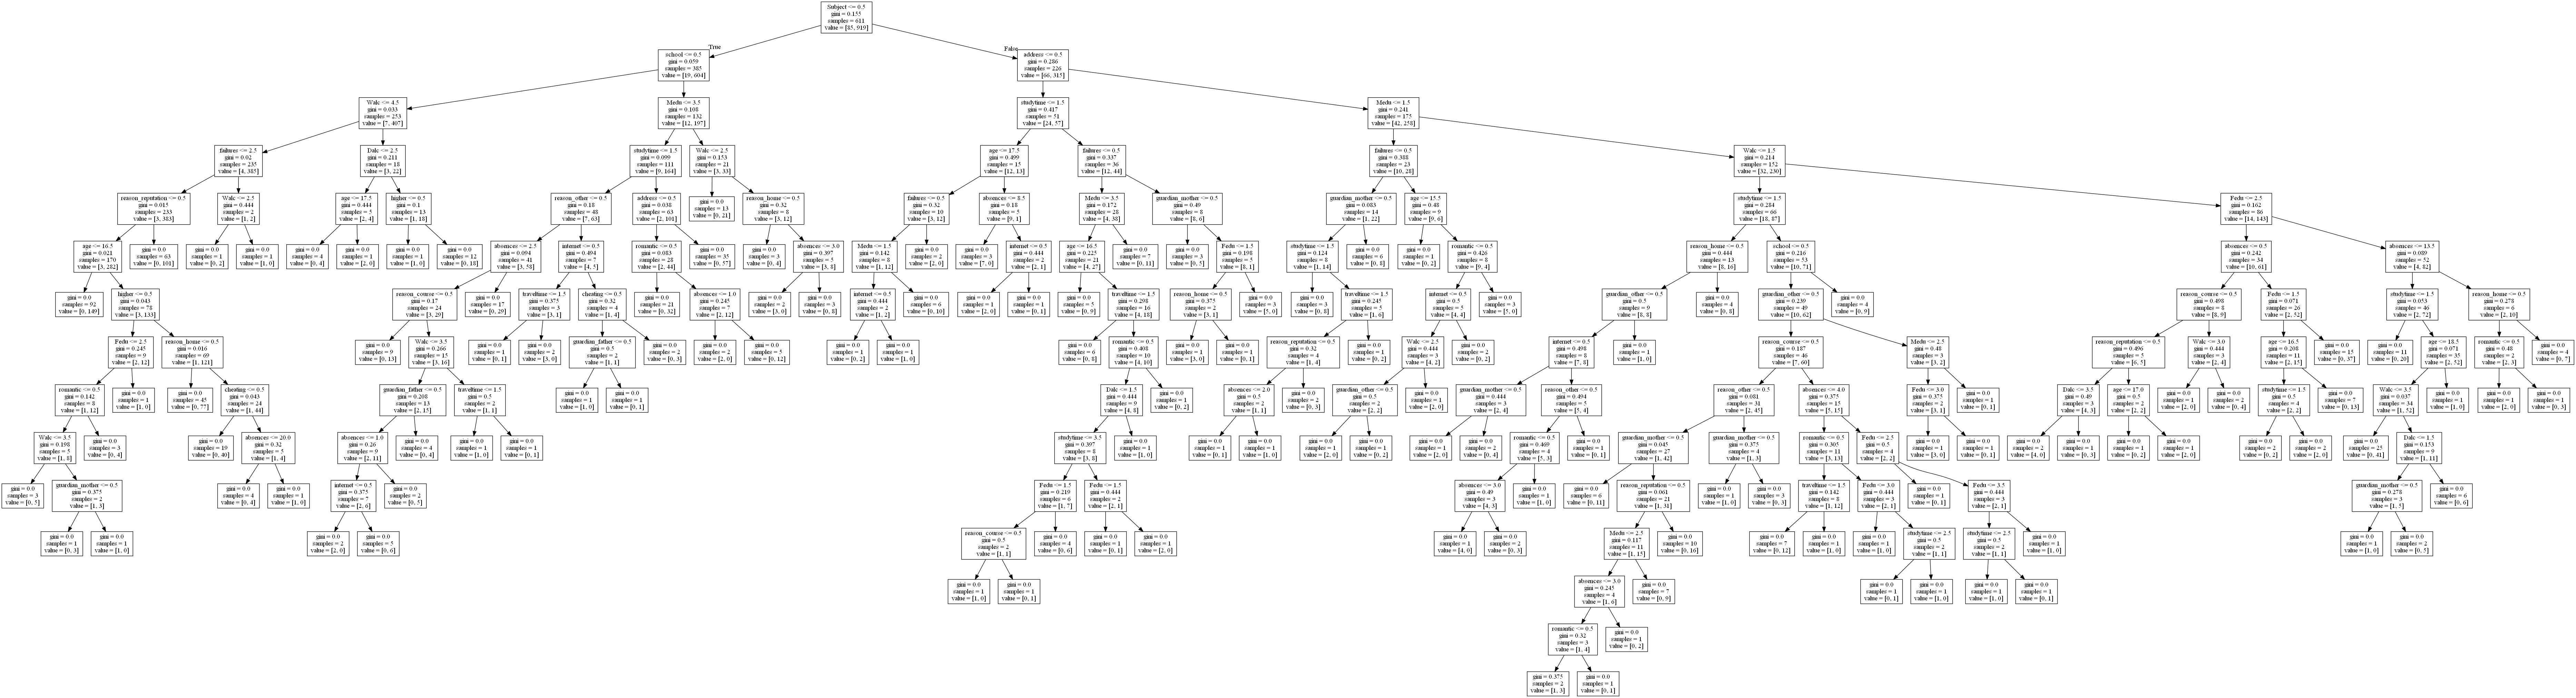

0.9003930348258706
Train: 0.9738480697384807
Test: 0.9701492537313433


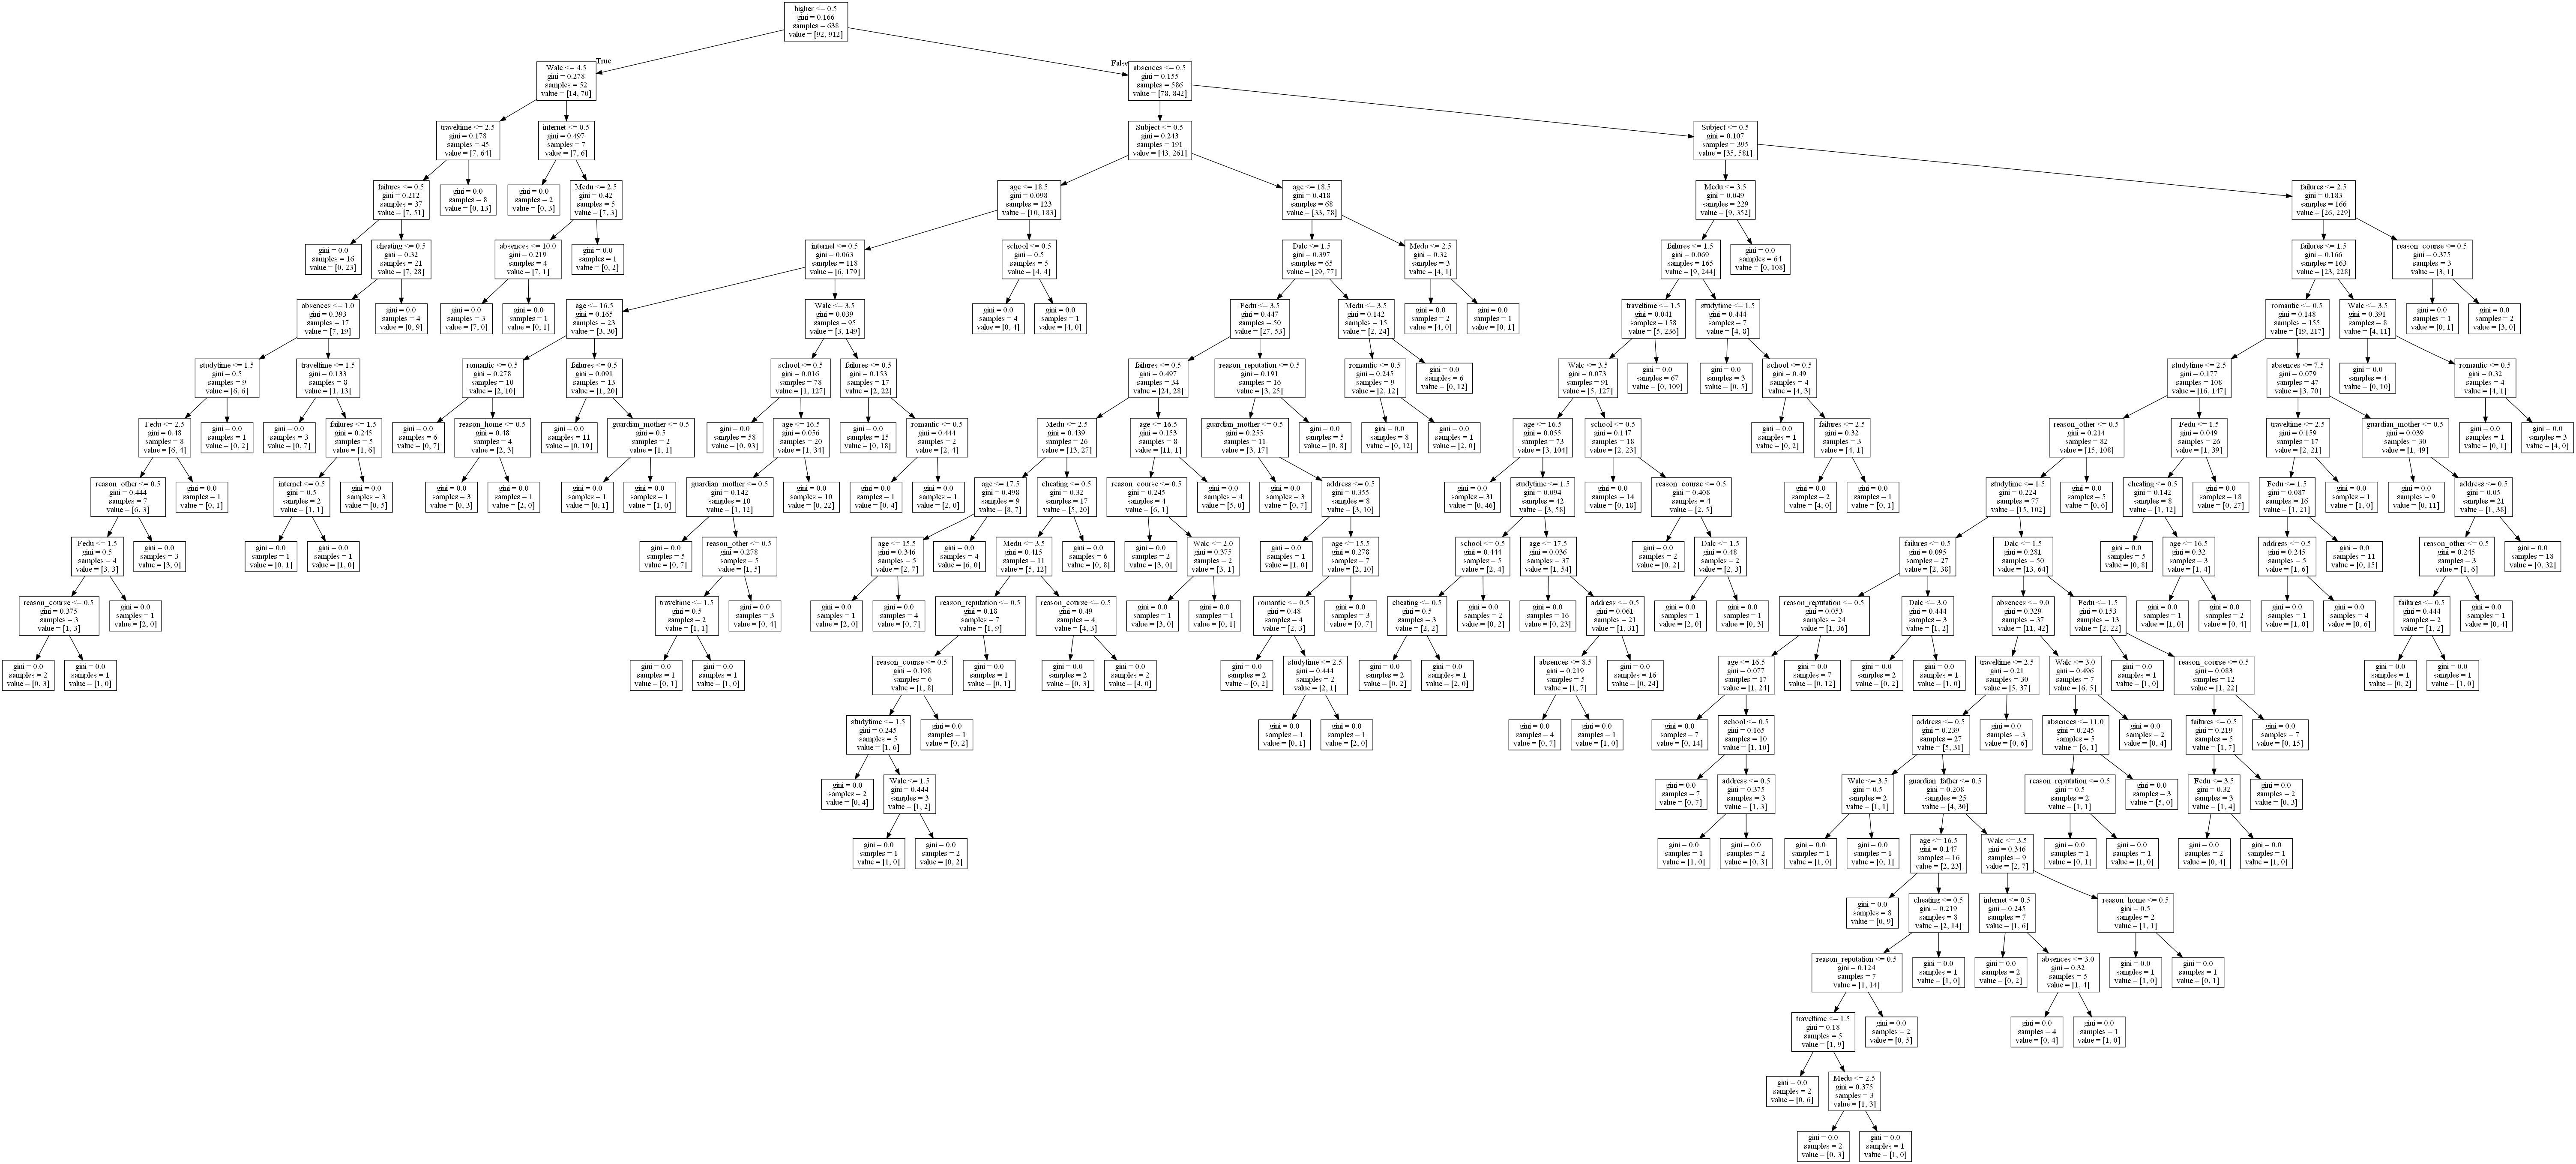

0.9023781094527363
Train: 0.9800747198007472
Test: 1.0


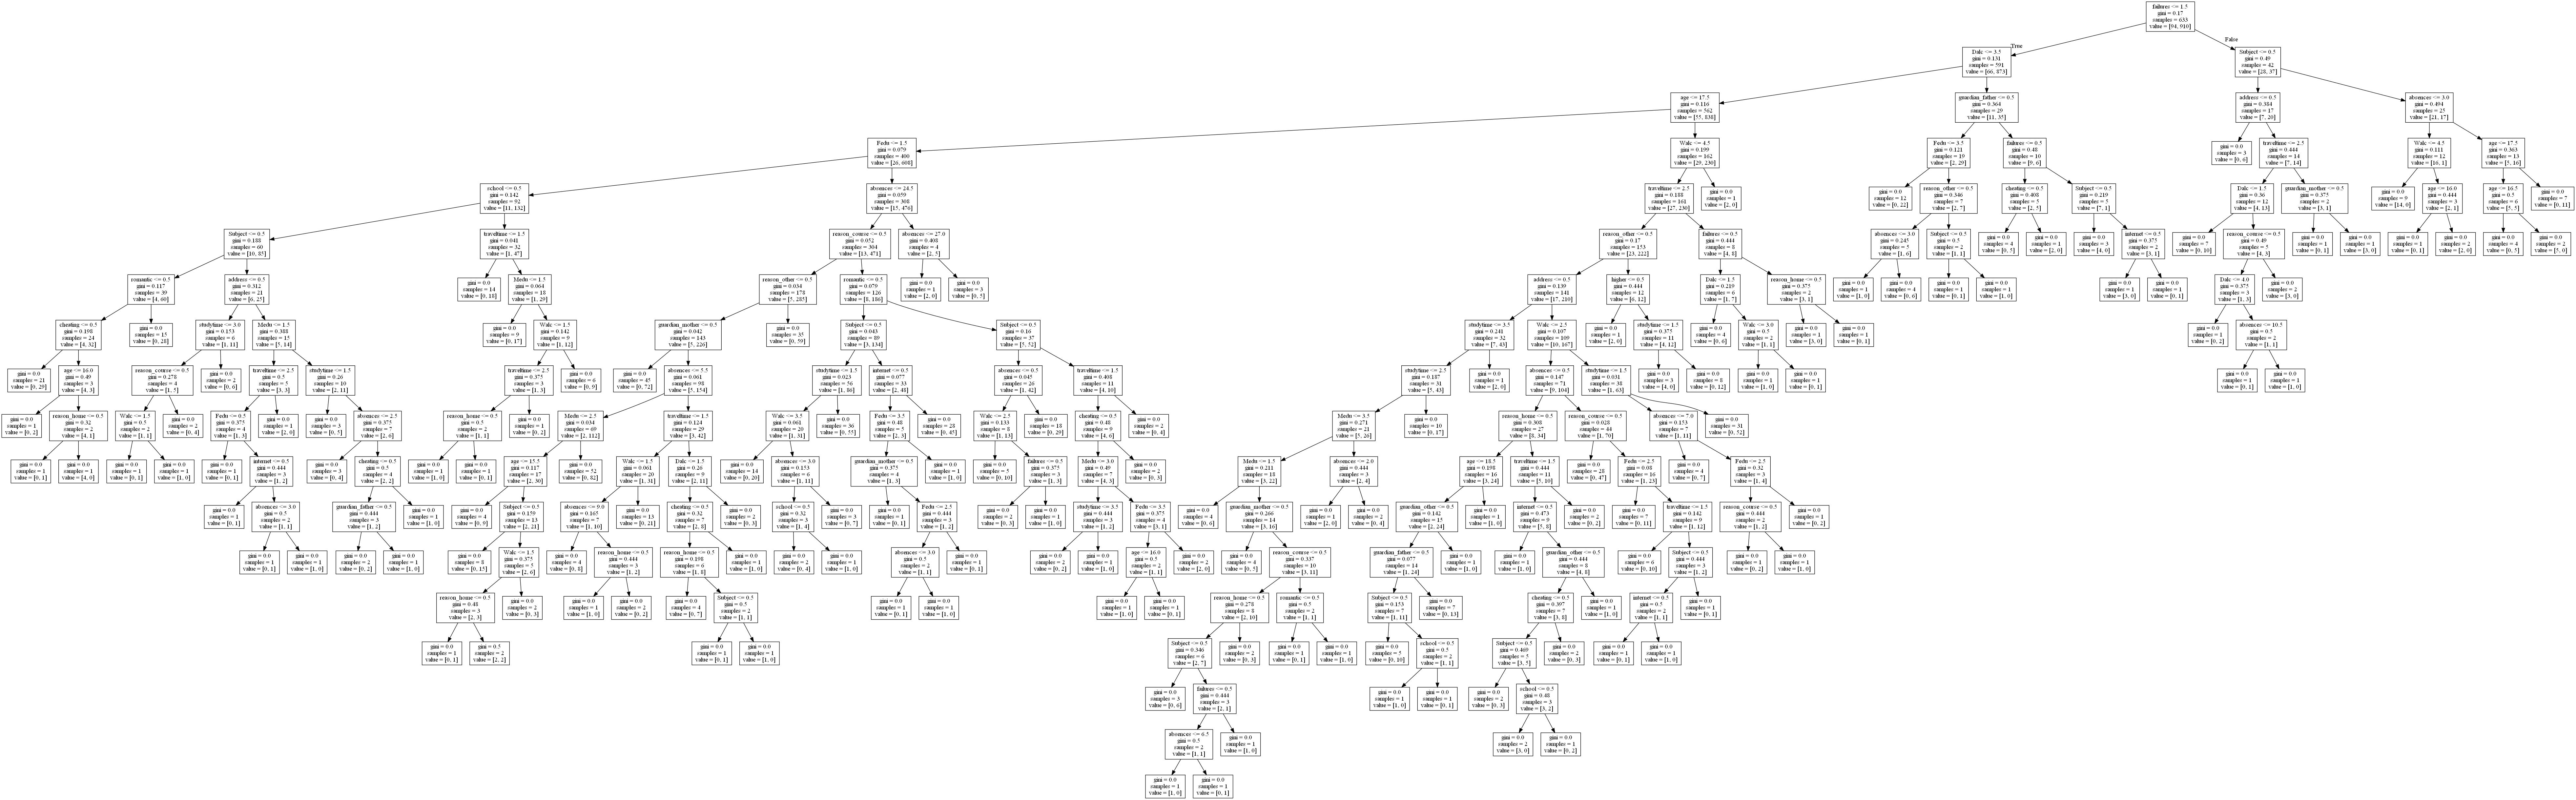

0.9053830845771145
Train: 0.9962640099626401
Test: 0.9850746268656716


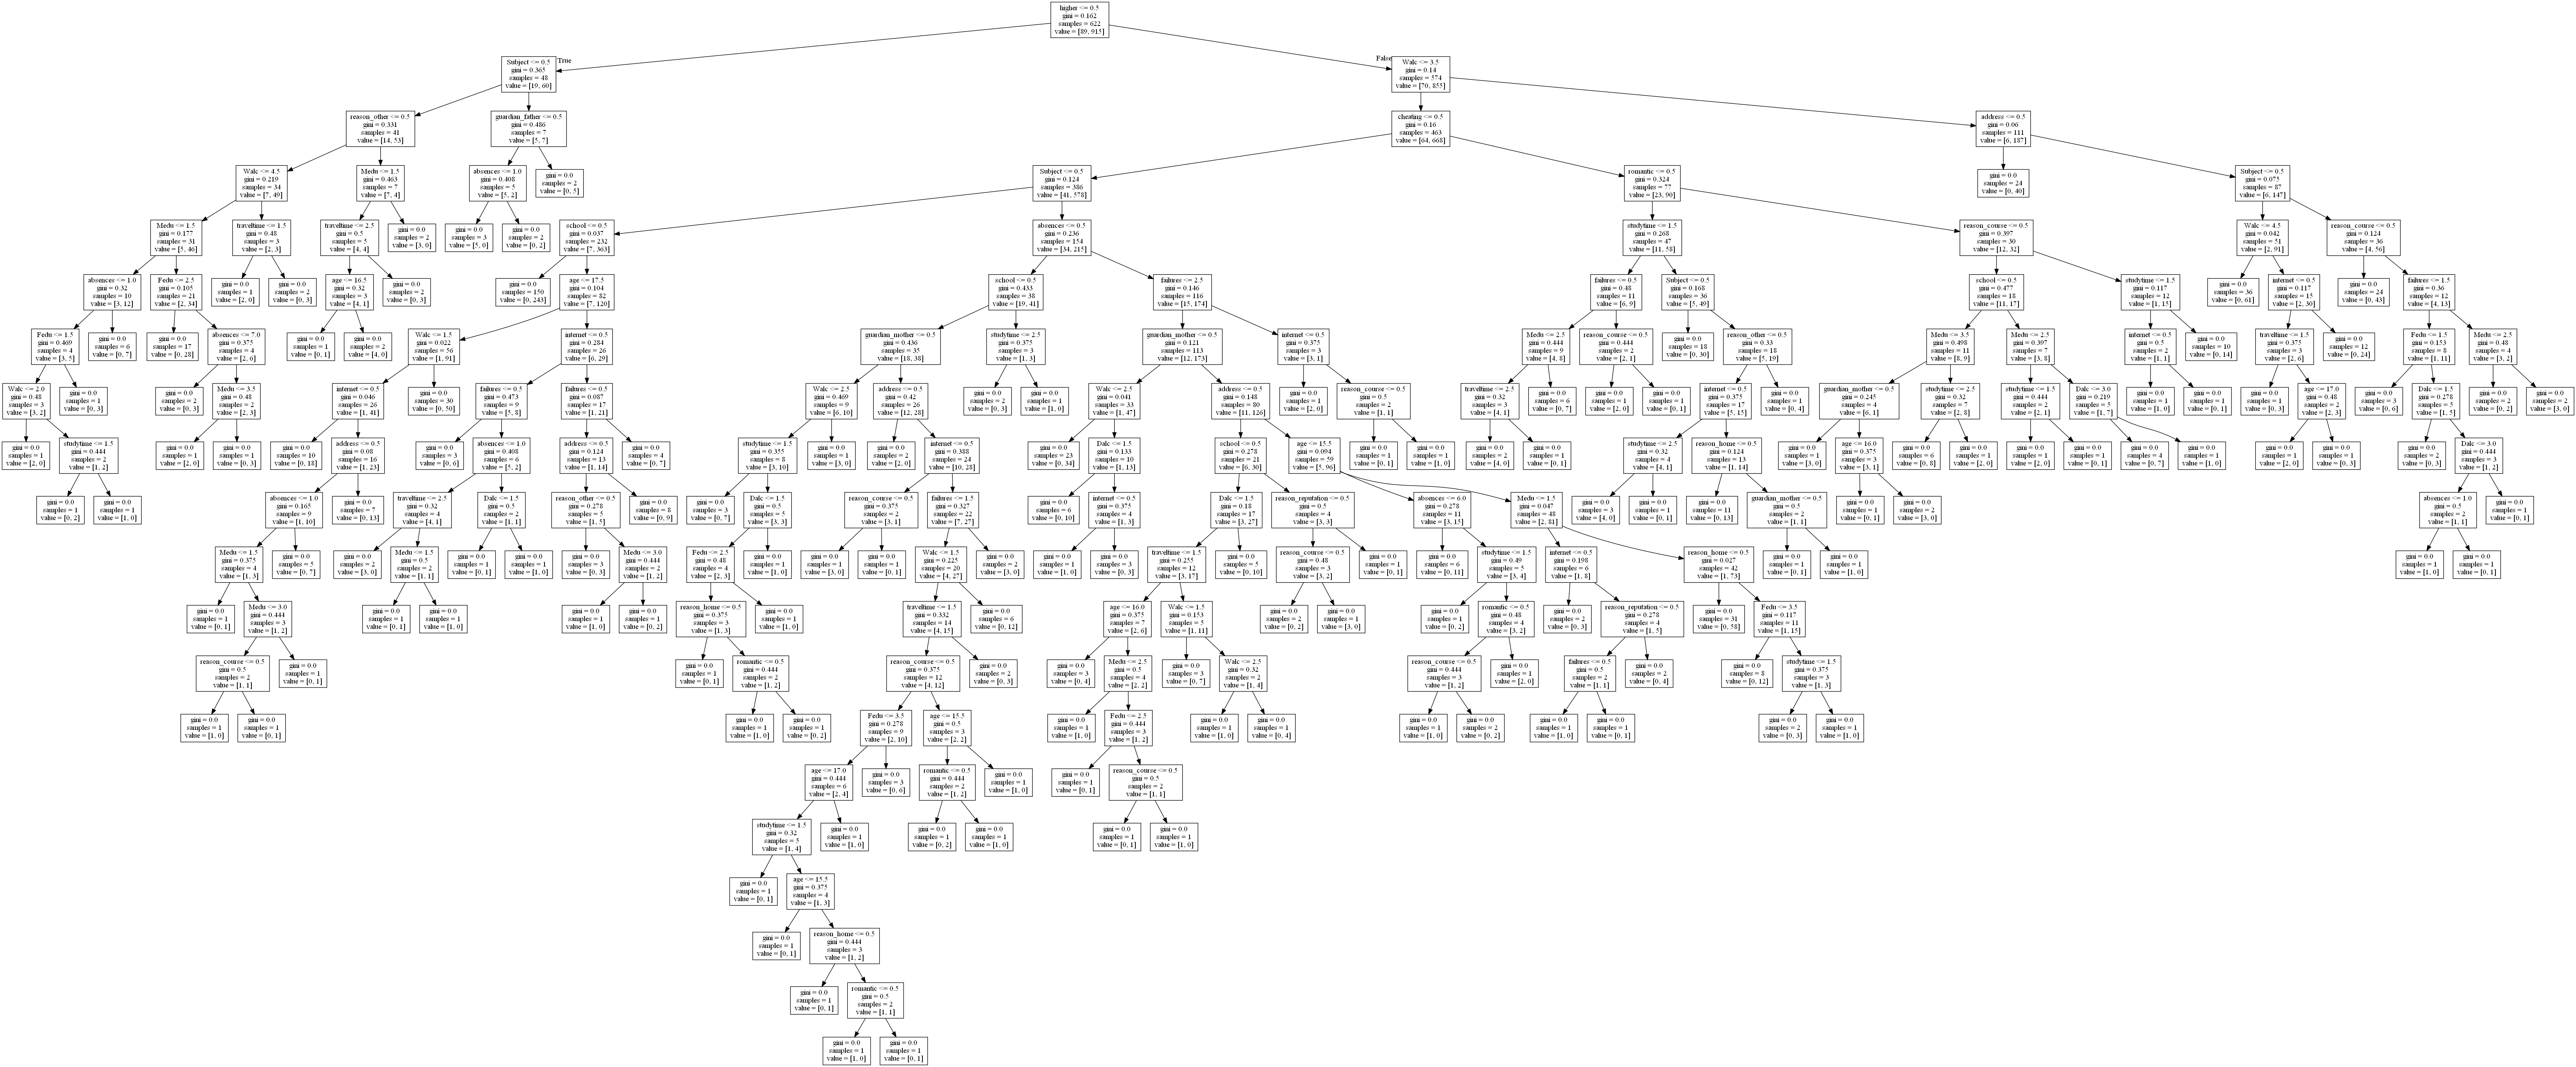

0.9023980099502488
Train: 0.9975093399750934
Test: 1.0


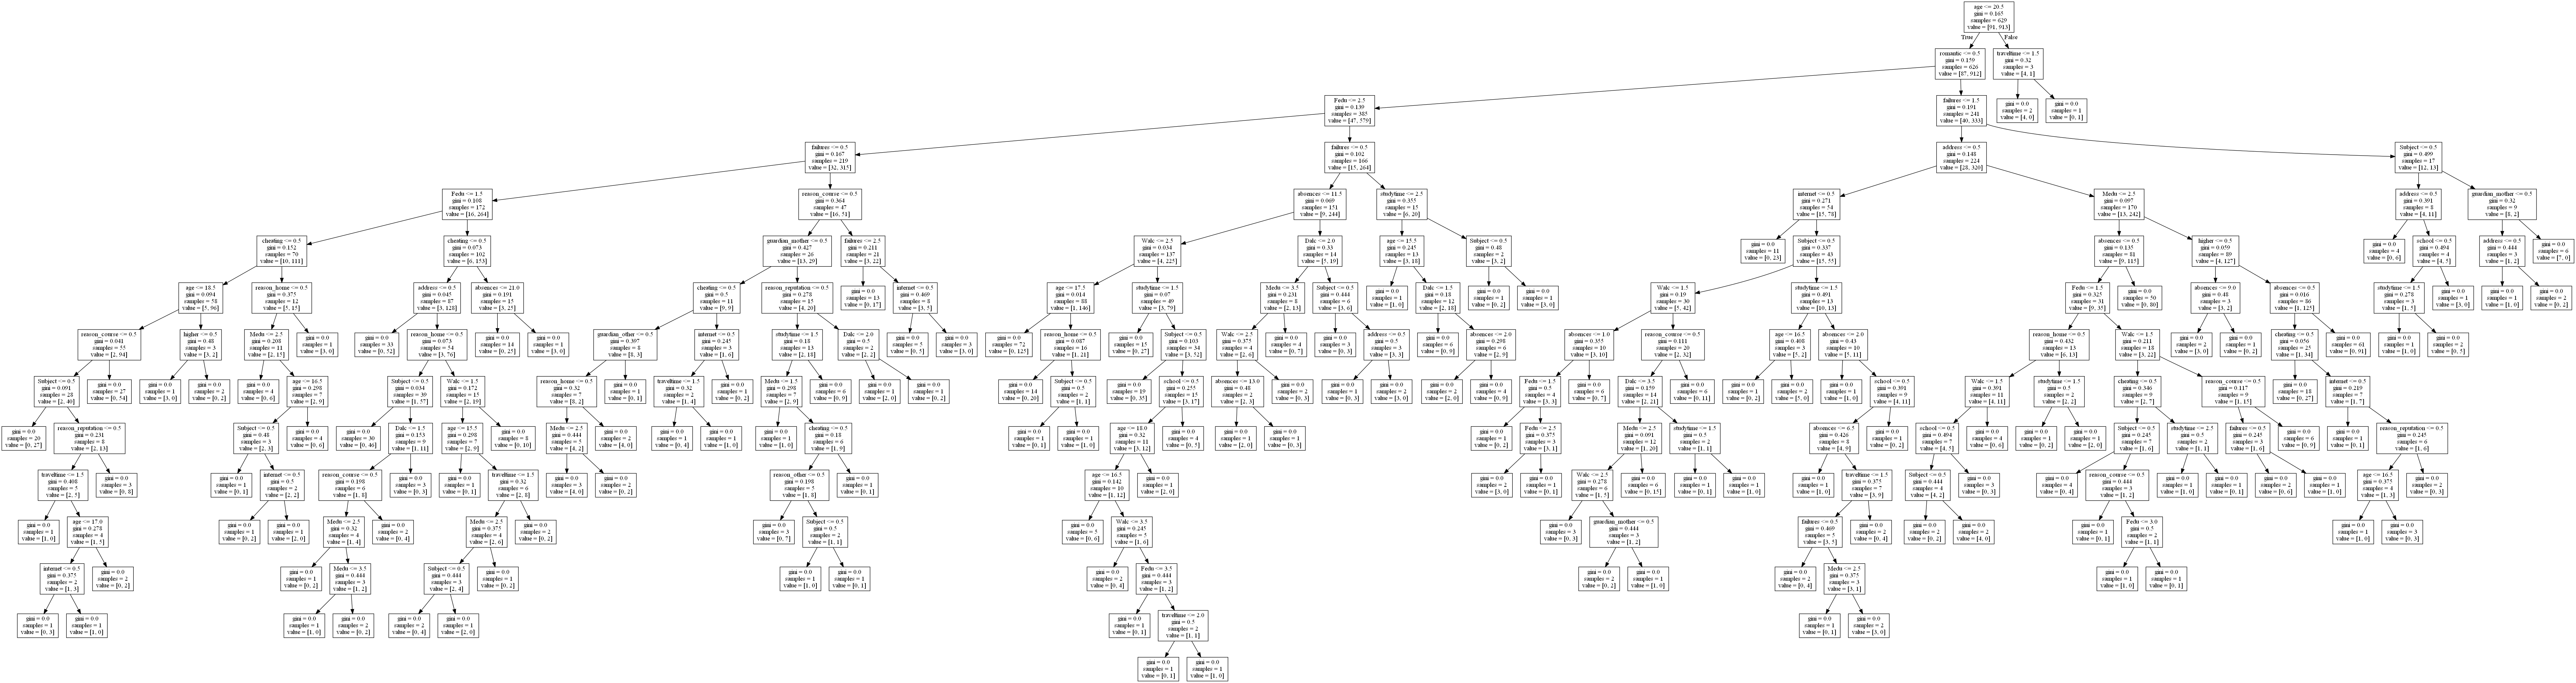

0.9093631840796019
Train: 0.9987546699875467
Test: 1.0


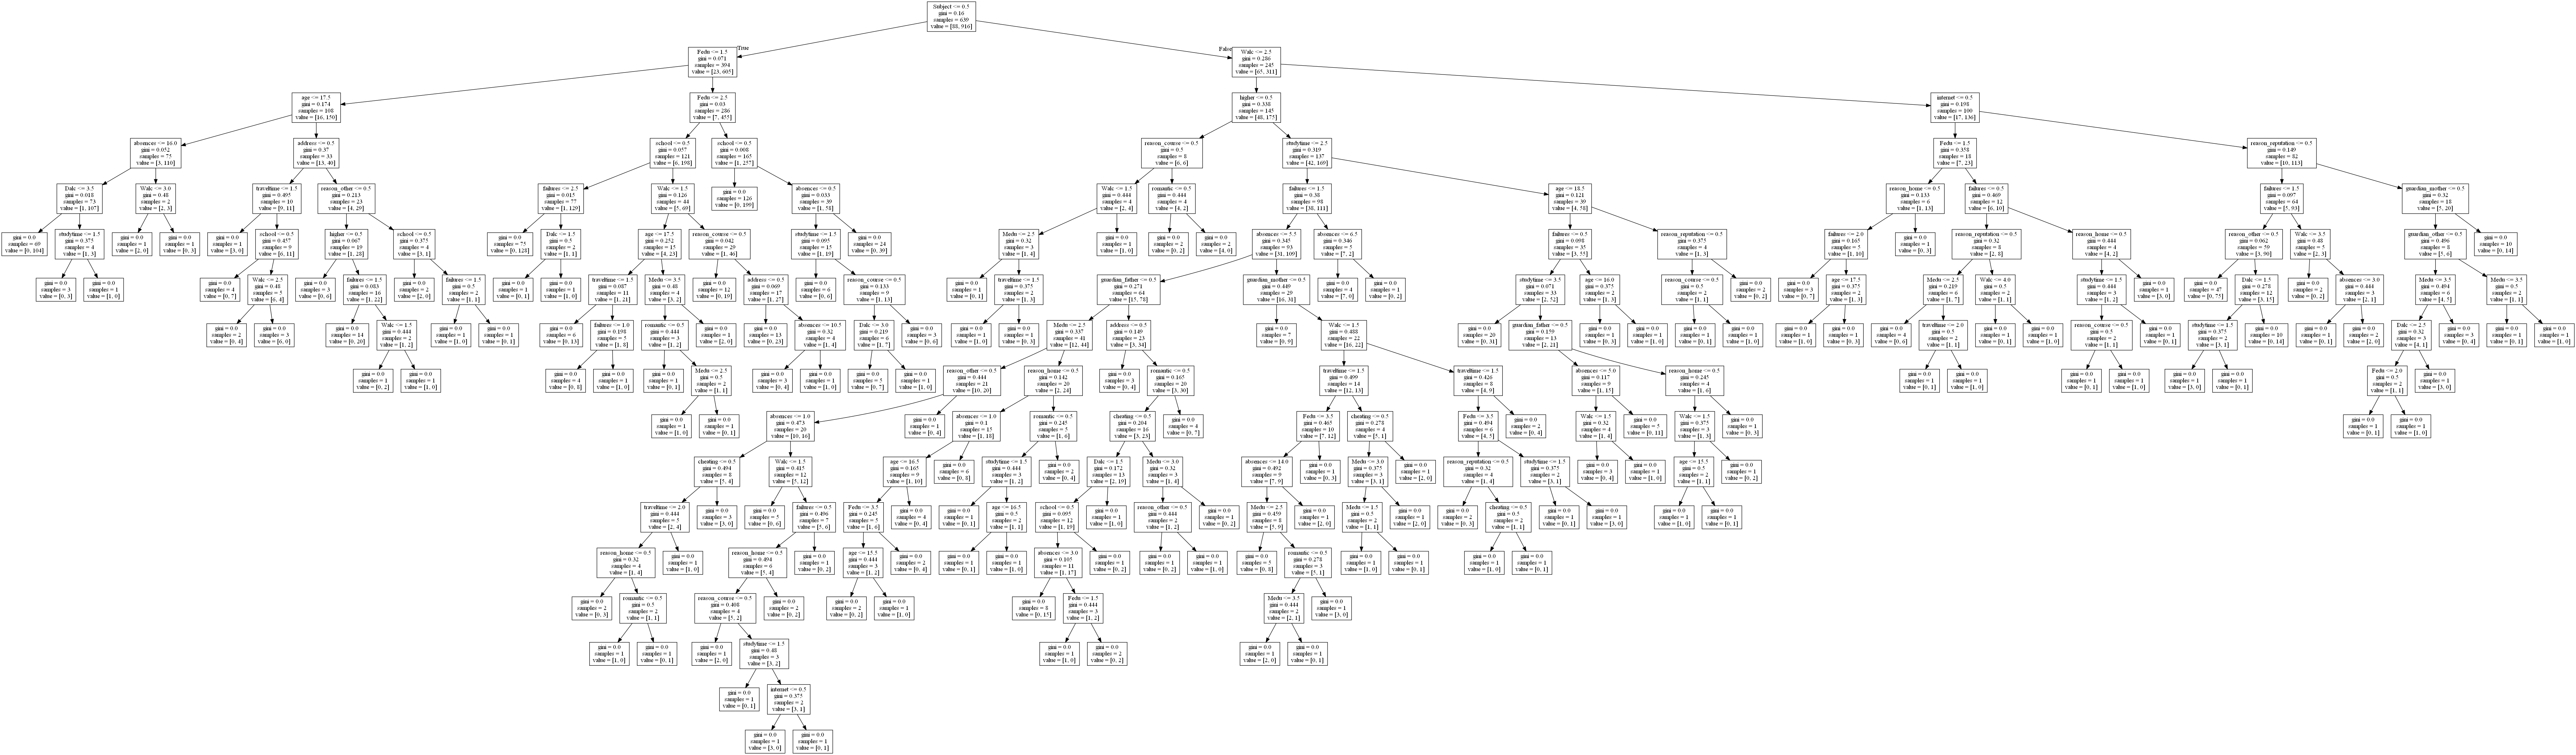

In [52]:
n_estimators= [1,2,3,5,10,20,50,100]
for i in n_estimators:
    cvs = cross_val_score(RandomForestClassifier(n_estimators=i), X, y, cv=5,n_jobs=2)
    
    print( cvs.mean())
    print('Train:',model.score(X_train, y_train))
    print('Test:',model.score(X_test, y_test))
    model = RandomForestClassifier(n_estimators=i).fit(X, y)

  
    graph = Source(export_graphviz(model.estimators_[0], out_file=None, feature_names=feature_names))
    png = graph.pipe(format='png')
    display(Image(png))

cvs.mean() растет с увеличением деревьем, но для 50 и 100 деревьев результаты схожи. 


Использовать 50 и 100 деревьев будет неоптимально

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [53]:
%%time


f1_scorer = make_scorer(f1_score, pos_label="yes")
params_rf = {'n_estimators': [5,10,20,50, 100, 200], 'max_depth': range(2, 7), 'min_samples_split': range(2, 11, 2)}
rf = RandomForestClassifier(random_state=17, oob_score = True)
grid_rf = GridSearchCV(estimator=rf, param_grid = params_rf, cv = 5, scoring=f1_scorer, 
verbose=1, n_jobs = 2)

grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Wall time: 41 s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=17),
             n_jobs=2,
             param_grid={'max_depth': range(2, 7),
                         'min_samples_split': range(2, 11, 2),
                         'n_estimators': [5, 10, 20, 50, 100, 200]},
             scoring=make_scorer(f1_score, pos_label=yes), verbose=1)

In [54]:
def draw_roc_auc_curve(y_test, y_pred_proba,title):
    fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} ROC-кривой')
    plt.legend(loc="lower right")
    plt.show()

Best hyperparameters:
 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 5}
F1:  0.9421052631578948


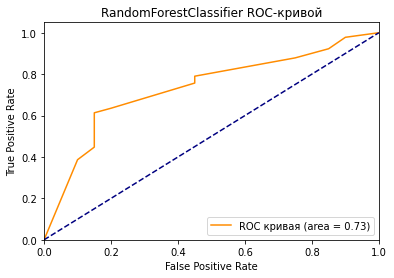

In [55]:
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)
best_model_rf = grid_rf.best_estimator_
y_pred = best_model_rf.predict(X_test)
print('F1: ',f1_score(y_test, y_pred))

y_pred_proba = best_model.predict_proba(X_test)
roc_auc_log = roc_auc_score(y_test, y_pred_proba[:,1])
draw_roc_auc_curve(y_test, y_pred_proba,"RandomForestClassifier")

[0.9470899470899471, 0.9421052631578948, 0.9421052631578948, 0.9421052631578948, 0.9476439790575917]


Text(0, 0.5, 'F1 score')

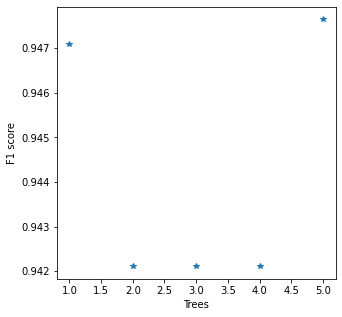

In [56]:
estimator = best_model_rf.estimators_
f1=[]
for tree_in_forest in estimator:
    f1.append(f1_score(y_test,  tree_in_forest.predict(X_test)))
print(f1)
fig = plt.figure(figsize=(5, 5))   
plt.plot([x for x in range(1, len(f1) + 1)], f1, "*")
plt.xlabel('Trees')
plt.ylabel('F1 score')

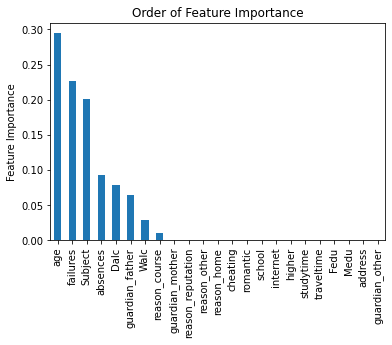

In [57]:
Relative_Feature_importance = pd.Series(best_model_rf.feature_importances_, feature_names).sort_values(ascending=False)
Relative_Feature_importance.plot(kind='bar', title='Order of Feature Importance')
plt.ylabel('Feature Importance')
plt.show()

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best hyperparameters:
 {'C': 0.615848211066026, 'penalty': 'l2'}


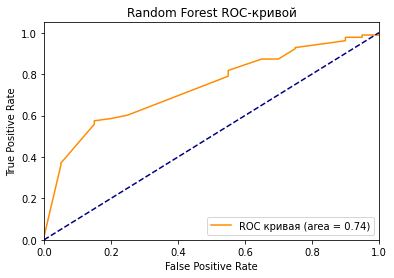

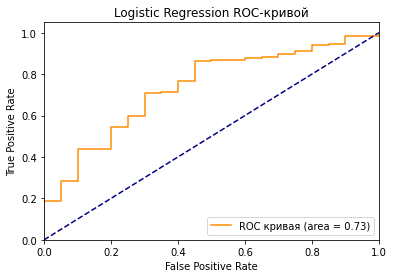

Roc_auc LogisticRegression = 0.7345303867403314
Roc_auc Random Forest = 0.73646408839779


In [58]:
from sklearn.linear_model import LogisticRegression
parameters = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}
logit = GridSearchCV(LogisticRegression(random_state=0),parameters,cv = 5, verbose=True, n_jobs=2)
logit.fit(X_train, y_train)
best_hyperparams = logit.best_params_
print('Best hyperparameters:\n', best_hyperparams)
best_model = logit.best_estimator_
# Predict the test set labels...
y_pred = best_model.predict(X_test)
roc_auc_log = roc_auc_score(y_test, y_pred)

from sklearn.metrics import roc_curve, auc
y_pred_proba = best_model_rf.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba[:,1])
draw_roc_auc_curve(y_test, y_pred_proba,"Random Forest")

y_pred_proba = best_model.predict_proba(X_test)
roc_auc_log = roc_auc_score(y_test, y_pred_proba[:,1])
draw_roc_auc_curve(y_test, y_pred_proba,"Logistic Regression")

print(f"Roc_auc LogisticRegression = {roc_auc_log}\nRoc_auc Random Forest = {roc_auc_rf}")

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

0.9014179104477613
[04:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.9414694894146949
Test: 0.9104477611940298


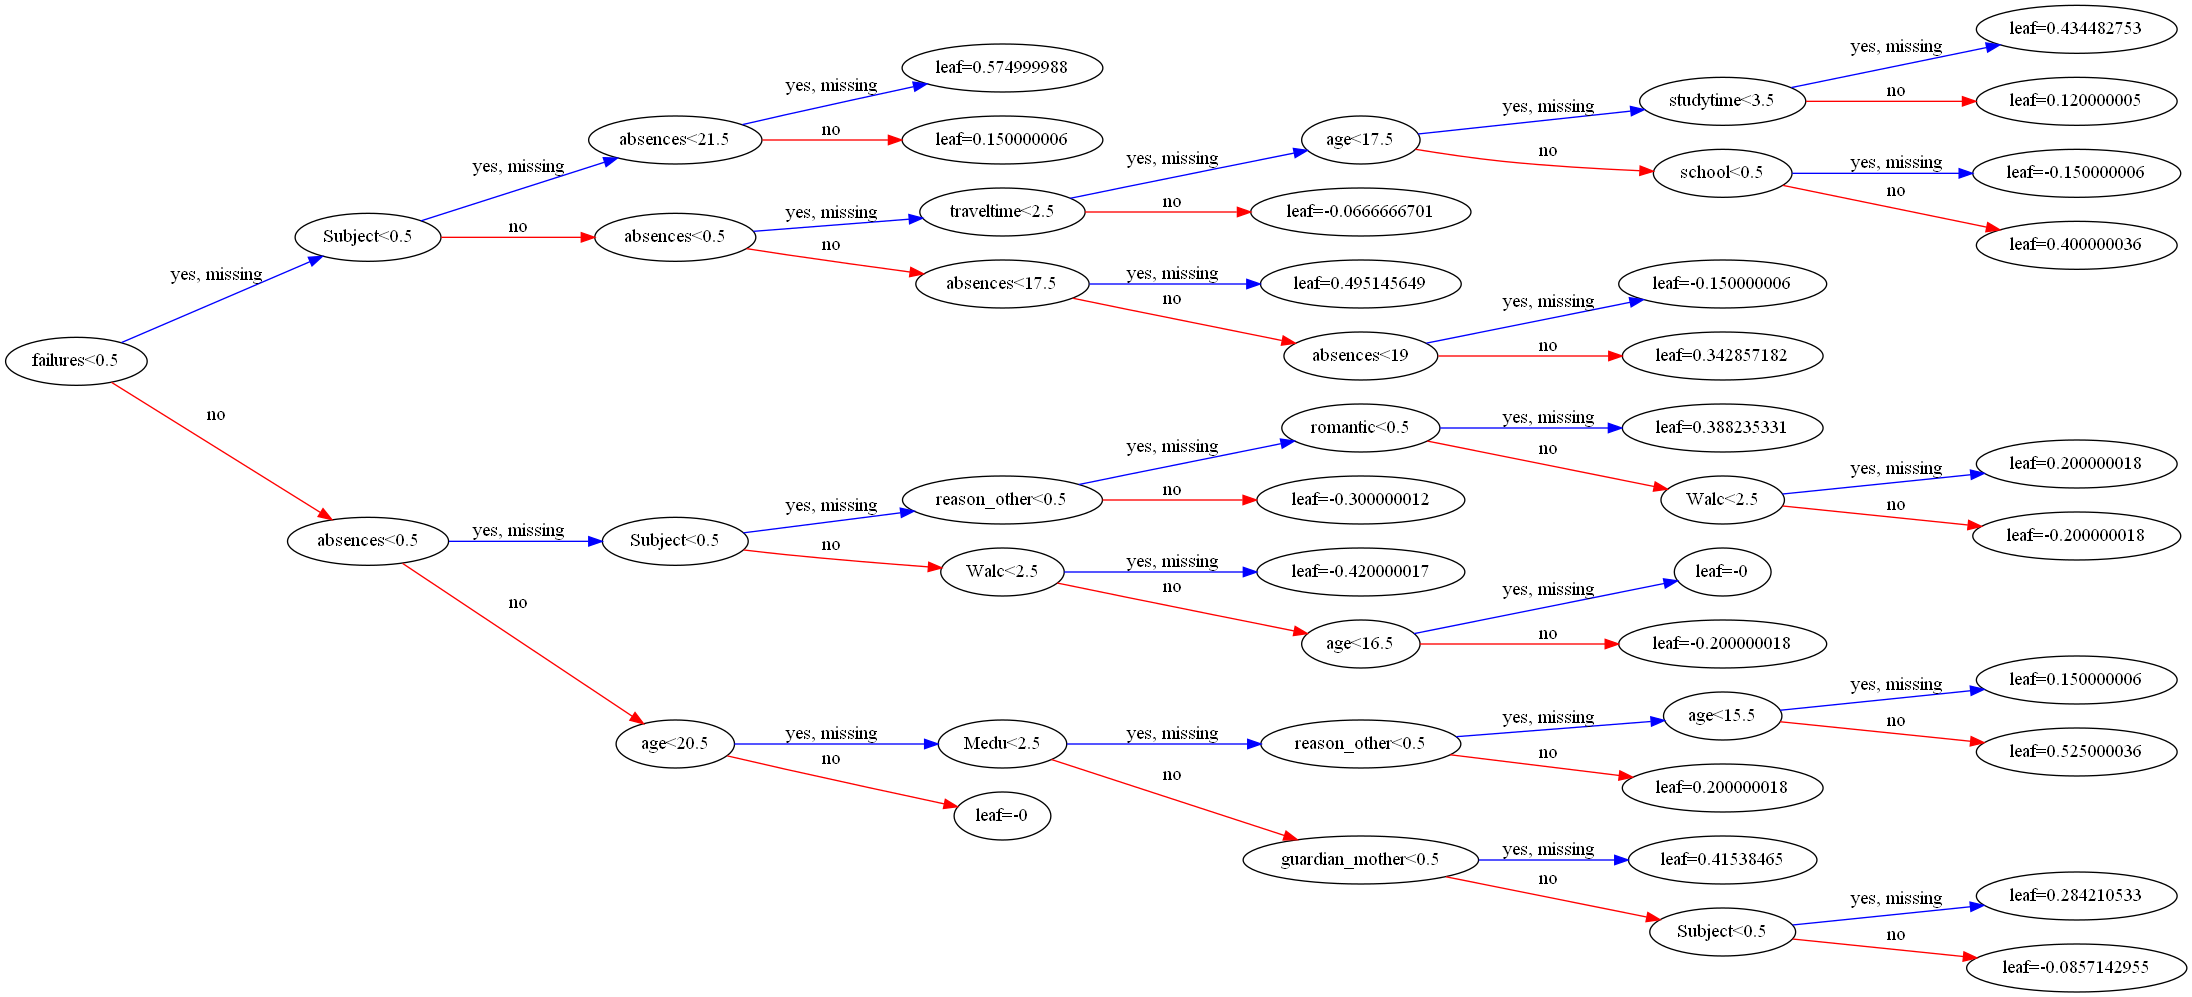

0.9093830845771145
[04:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.9389788293897883
Test: 0.9203980099502488


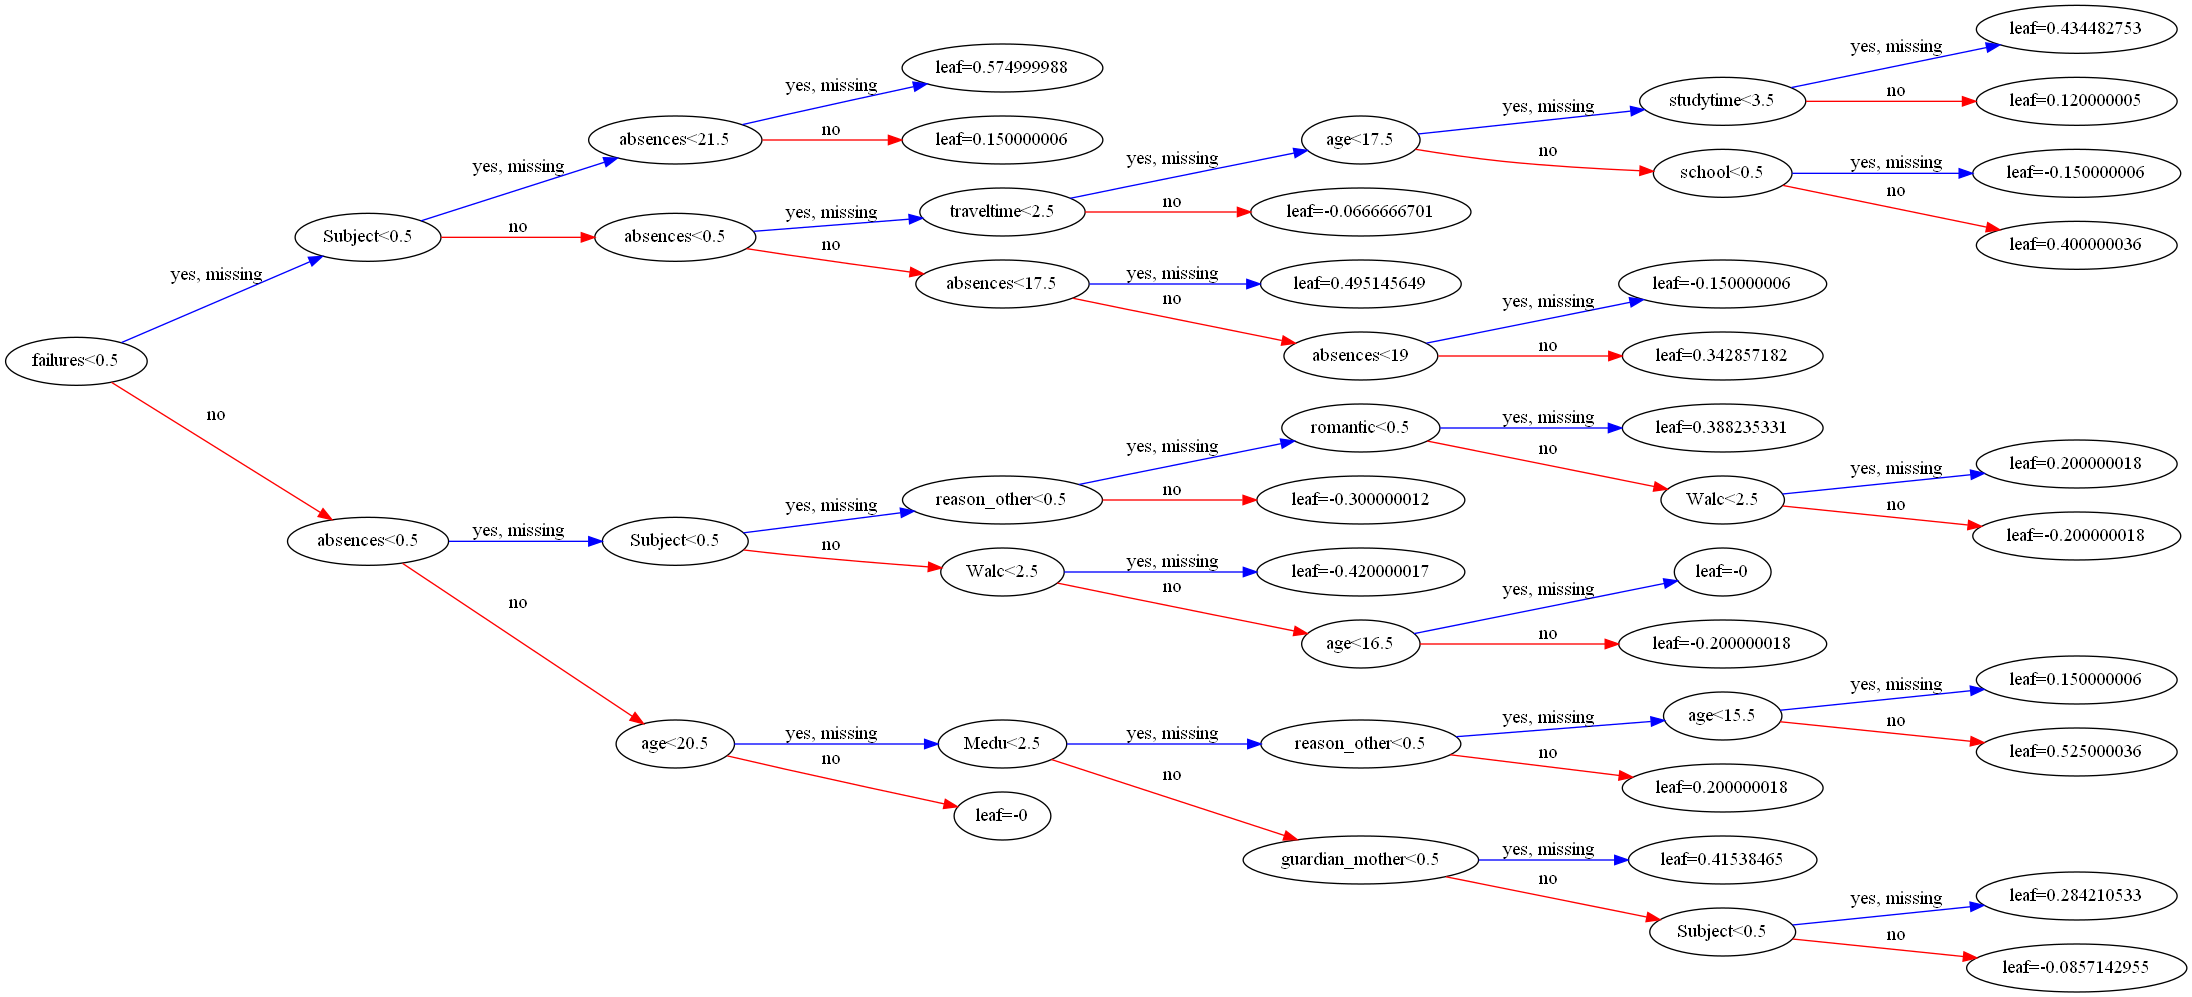

0.9043930348258706
[04:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.9514321295143213
Test: 0.9253731343283582


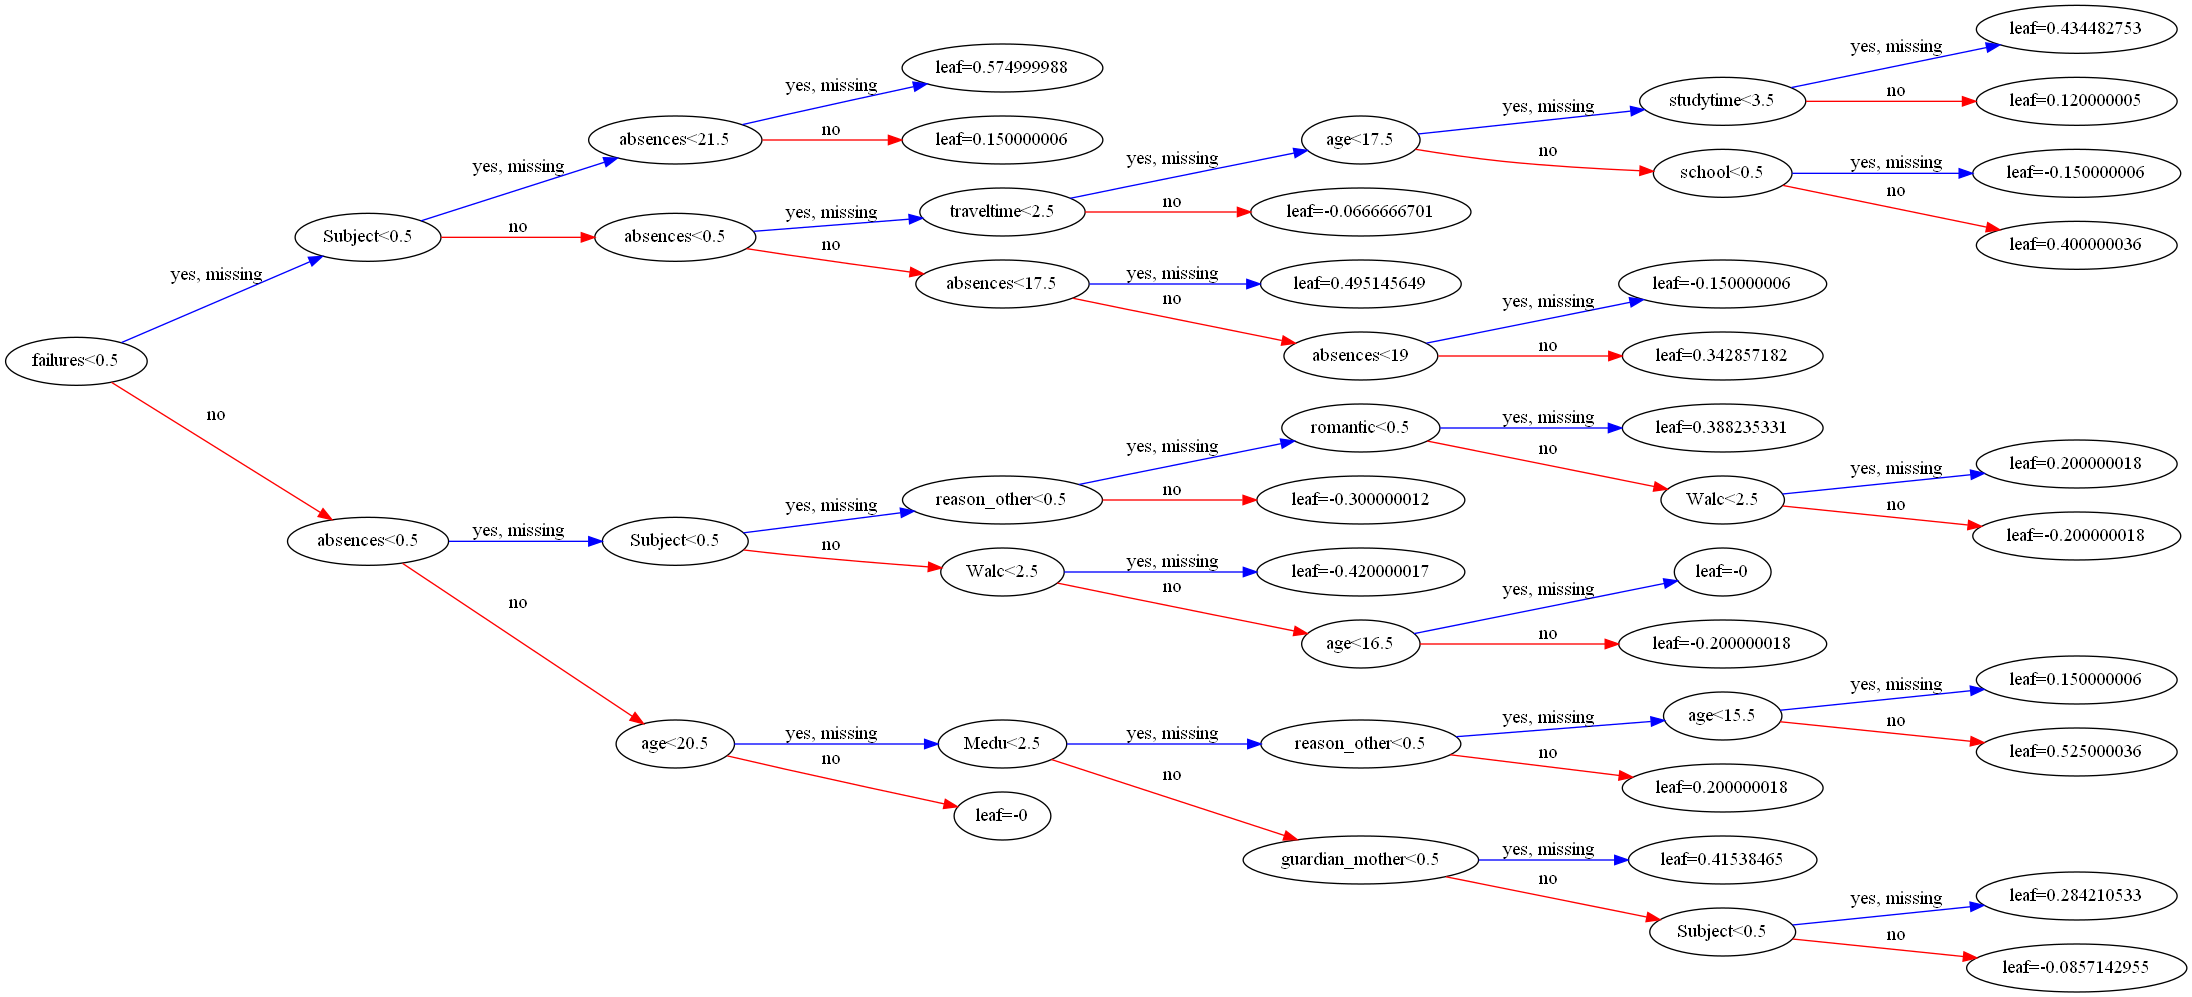

0.9083830845771145
[04:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.950186799501868
Test: 0.9402985074626866


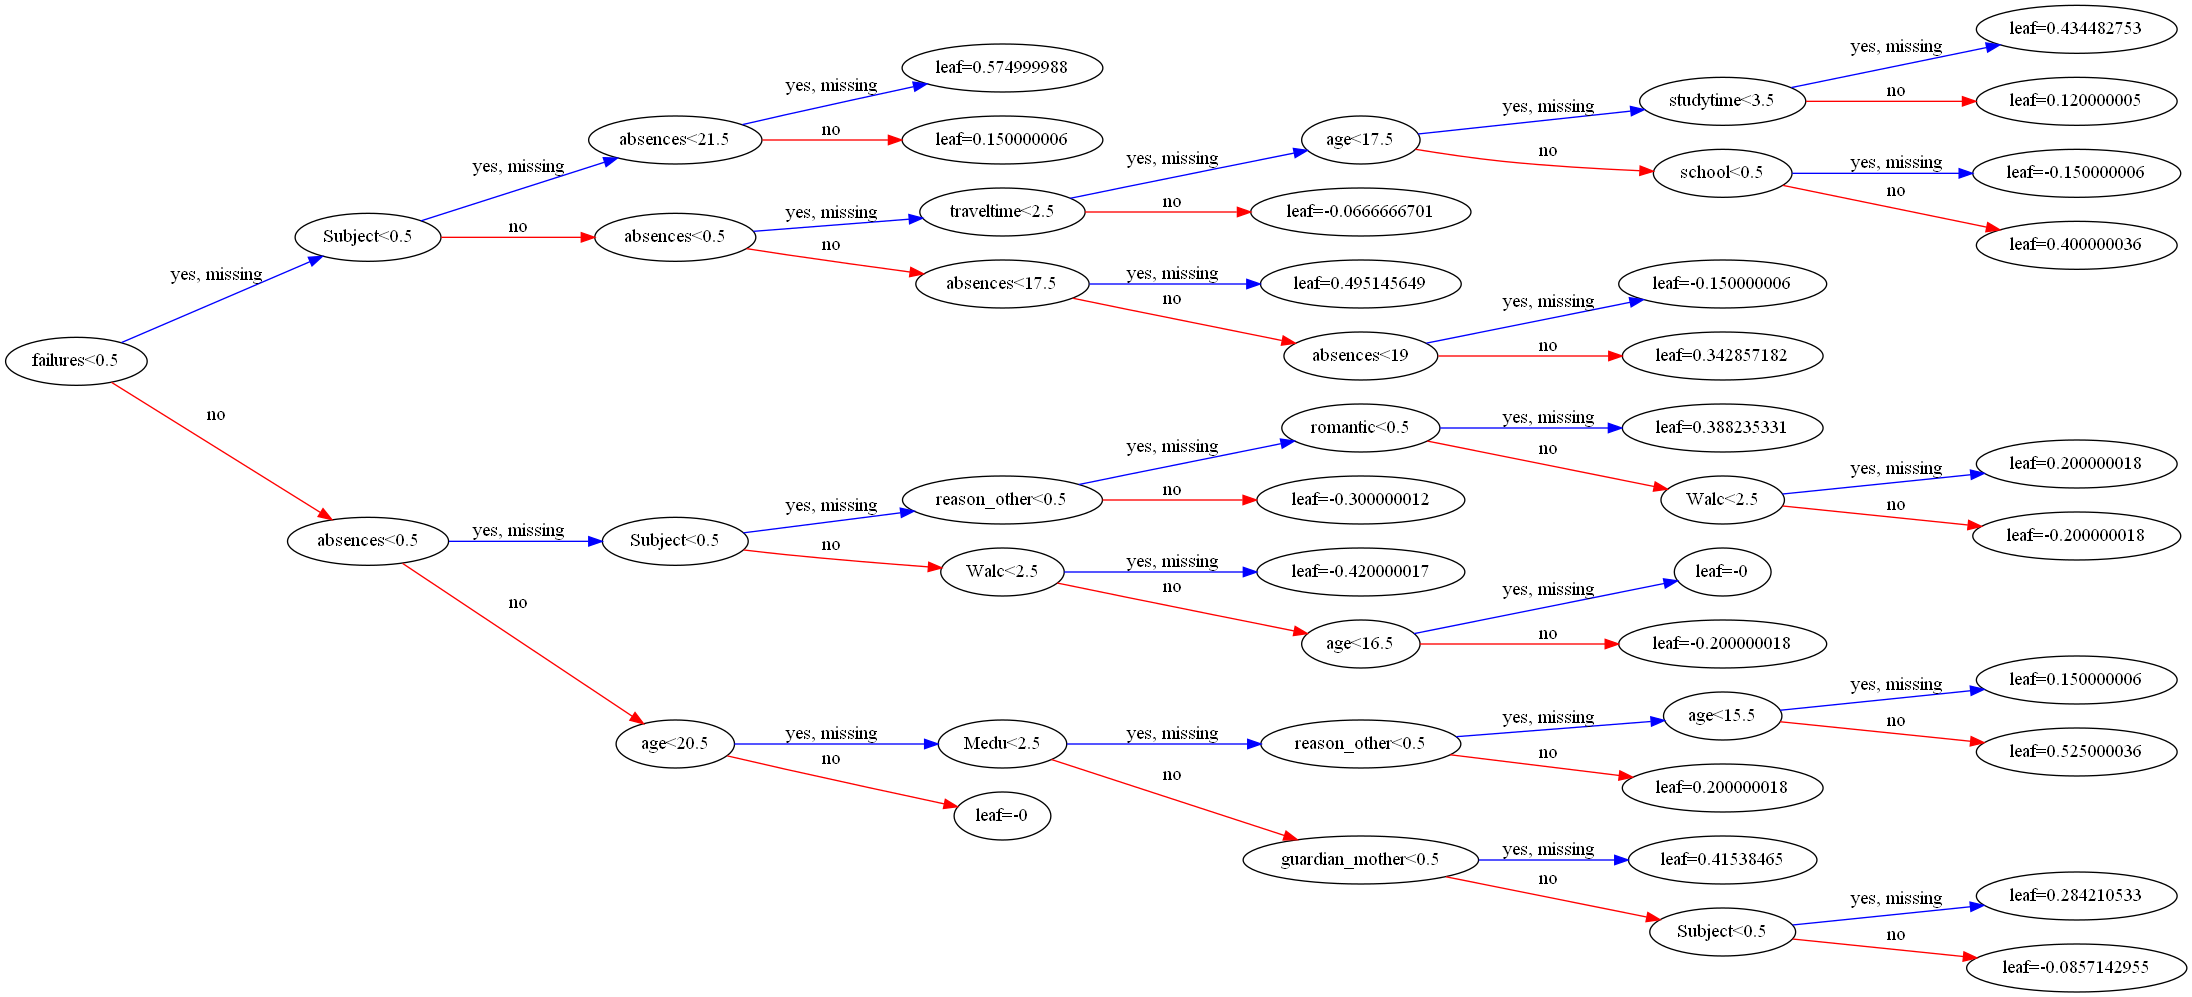

0.9113631840796022
[04:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.958904109589041
Test: 0.9502487562189055


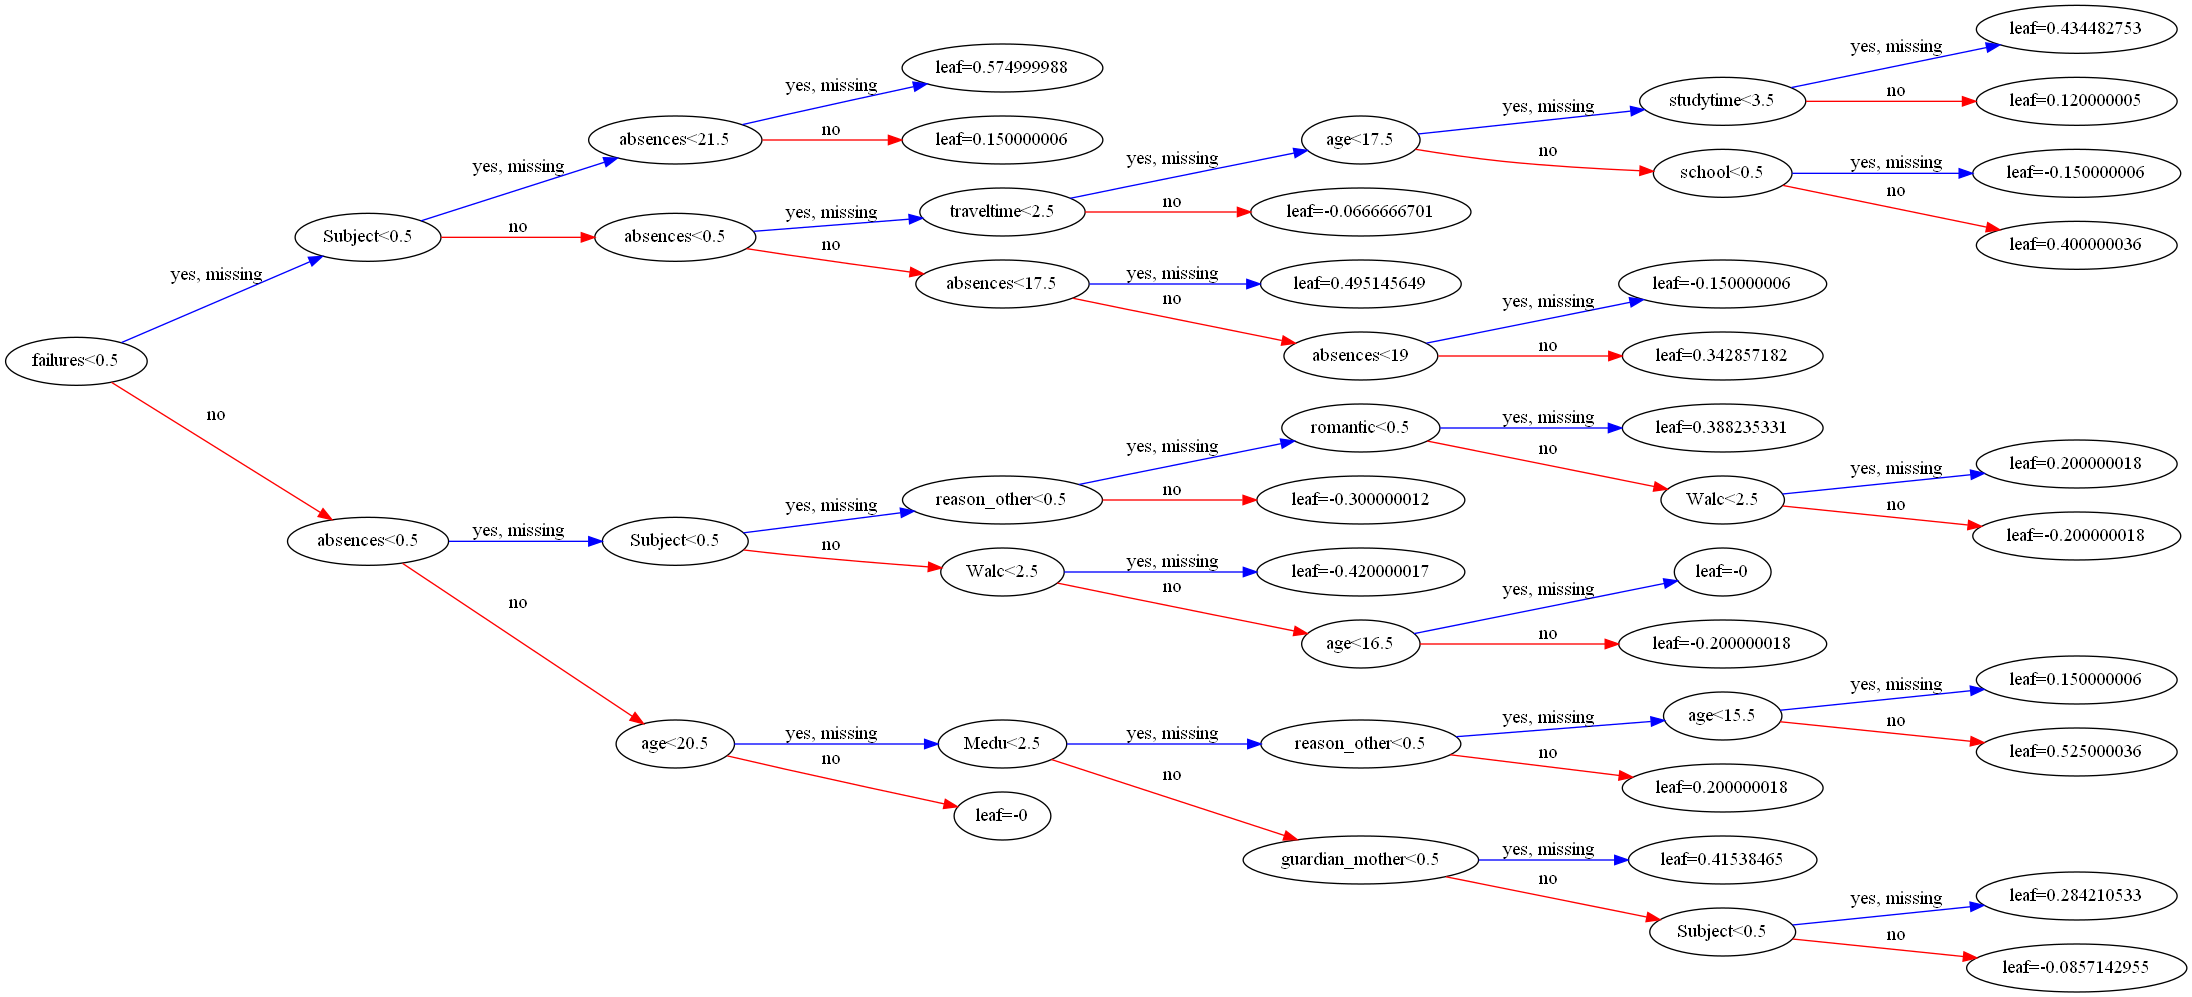

Fitting 3 folds for each of 270 candidates, totalling 810 fits
[04:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "xgbclassifier__gamma", "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight", "xgbclassifier__n_estimators", "xgbclassifier__objective" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best hyperparameters:
 {'xgbclassifier__gamma': 0, 'xgbclassifier__learni

0.9468085106382979

In [60]:
n_estimators= [1,2,3,5,10]
for i in n_estimators:
    cvs = cross_val_score(XGBClassifier(n_estimators=i), X, y, cv=5,n_jobs=2)
    
    print( cvs.mean())
    model = XGBClassifier(n_estimators=i).fit(X, y)
    print('Train:',model.score(X_train, y_train))
    print('Test:',model.score(X_test, y_test))
    
    
    xgb.to_graphviz(model, num_trees=0, rankdir='LR')
    graph = Source(xgb.to_graphviz(model, num_trees=0, rankdir='LR'))
    png = graph.pipe(format='png')
    display(Image(png))  
    
    
    
param_grid = [
    {'xgbclassifier__n_estimators': [1000],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], 
    'xgbclassifier__max_depth': [3, 6, 9],
    'xgbclassifier__min_child_weight': [1, 3, 5],
    'xgbclassifier__objective': ['multi:softmax'],
    'xgbclassifier__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5] }
]

grid_model_xgb = GridSearchCV(
    estimator= XGBClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=3,
    verbose=True,
    scoring=f1_scorer
)

grid_model_xgb.fit(X_train, y_train)


best_hyperparams = grid_model_xgb.best_params_
print('Best hyperparameters:\n', best_hyperparams)
best_model_rf = grid_model_xgb.best_estimator_
# Predict the test set labels...
y_pred = best_model_rf.predict(X_test)
f1_score(y_test, y_pred)

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [61]:
from sklearn.metrics import confusion_matrix
import pylab as pl

multi_df = df.copy()

for index, row in multi_df.iterrows():
    if (multi_df.at[index, 'G3'] < 8):
        multi_df.at[index, 'G3'] = 0
    if (multi_df.at[index, 'G3'] < 14 and multi_df.at[index, 'G3'] > 7 ):
        multi_df.at[index, 'G3'] = 1   
    if (multi_df.at[index, 'G3'] <18 and multi_df.at[index, 'G3'] >13 ):
        multi_df.at[index, 'G3'] = 2   
    if (multi_df.at[index, 'G3'] > 17):
        multi_df.at[index, 'G3'] = 3
multi_df.head(15)

X = multi_df.drop(["G1", "G2", "G3"], axis = 1)
y = multi_df["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 17, stratify=y)


### Логистическая регрессия

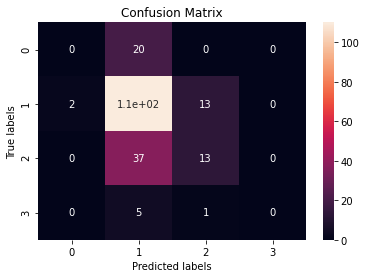

In [62]:
log_reg = LogisticRegression(max_iter = 10000, C=0.1)

log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

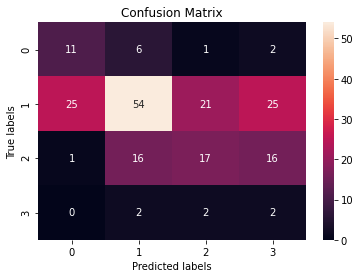

In [63]:
from sklearn.model_selection import  StratifiedKFold
c_values = np.linspace(1e-3, 1, 100)
penal = ['l1', 'l2']
tol = np.linspace(1e-4, 1, 8)
parameters = {'C': c_values, 'penalty': penal, 'tol': tol}
estimator = LogisticRegression(random_state=17, class_weight = 'balanced')
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)
model = GridSearchCV(estimator, parameters, cv=skf, scoring='accuracy', n_jobs = -1)
model.fit(X, y)
model.best_estimator_

best = model.best_estimator_
best.fit(X_train, y_train)
y_pred=best.predict(X_test)
preds_prob = best.predict_proba(X_test)

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

y_val_bin = label_binarize(y_test, classes=np.arange(y_train.nunique()))

plt.show()


In [64]:
model.best_score_

0.4322673267326733

### KNN

In [66]:
def metric():
    metrics = ['euclidean', 'minkowski', 'manhattan','correlation']
    acc = []
    for i in metrics:
        parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': [f'{i}'],
             'n_neighbors': range(3, 11)}
        estimator = KNeighborsClassifier()
        model = GridSearchCV(estimator, parameters, cv=skf, scoring='accuracy', n_jobs = -1)
        model.fit(X, y)
        acc.append(model.best_score_)
    print(acc,metrics)
    fig = plt.figure(figsize=(13, 10))   
    plt.plot(metrics, acc, "*")
    plt.xlabel('Metrics')
    plt.ylabel('Accuracy score')
    print(f'Maximal accuracy score: {max(acc)}')

In [67]:
parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'metric': ['euclidean', 'minkowski', 'manhattan','correlation'],
             'n_neighbors': range(3, 11)}
estimator = KNeighborsClassifier()
model = GridSearchCV(estimator, parameters, cv=skf, scoring='accuracy', n_jobs = -1)
model.fit(X, y)
model.best_score_

0.6373861386138613

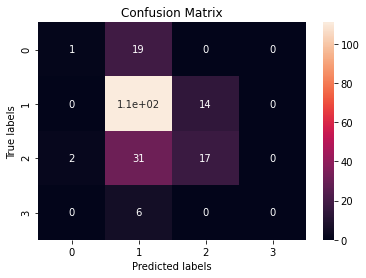

In [71]:
best = model.best_estimator_
best.fit(X_train, y_train)
y_pred=best.predict(X_test)
preds_prob = best.predict_proba(X_test)
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

### Дерево решений

Maximal accuracy score: 0.6218905472636815
0.6374554455445544


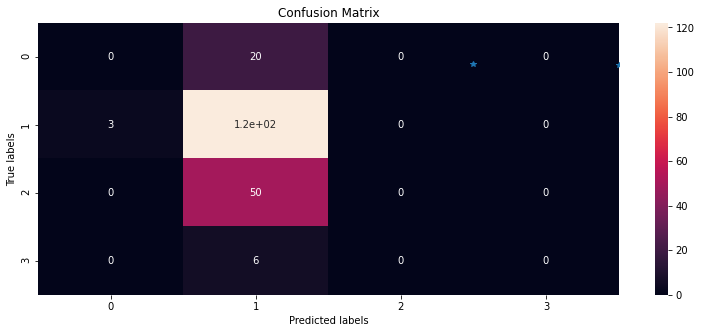

In [74]:
acc = []

for i in range(3, 10):
    estimator = DecisionTreeClassifier(random_state=17, max_depth = i).fit(X_train, y_train)
    acc.append(accuracy_score(estimator.predict(X_test), y_test))

fig = plt.figure(figsize=(13, 5))

plt.plot(range(3, 10), acc, "*")
plt.xlabel('Max depth')
plt.ylabel('Accuracy score')

print(f'Maximal accuracy score: {max(acc)}')

md = range(3, 10)
parameters = {'max_depth': md}
estimator = DecisionTreeClassifier(random_state=17)
clf = GridSearchCV(estimator, parameters, scoring='accuracy', cv=skf, n_jobs = -1)
clf.fit(X, y)
clf.best_estimator_

best = clf.best_estimator_
best.fit(X_train, y_train)
y_pred=best.predict(X_test)
preds_prob = best.predict_proba(X_test)
print(clf.best_score_)
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

### Random Forest

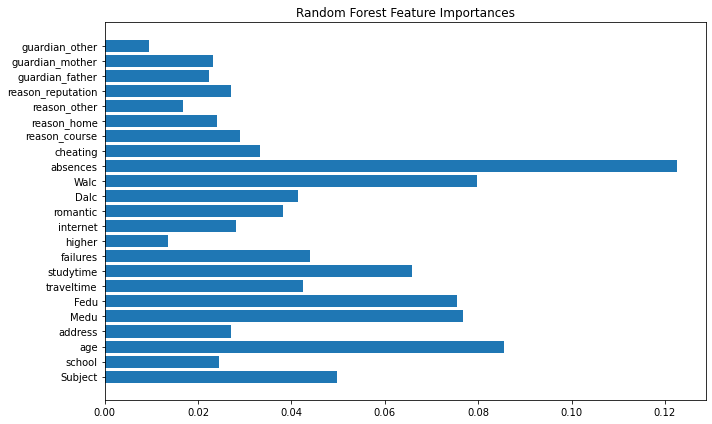

In [75]:
rf = RandomForestClassifier(random_state=17, oob_score = True).fit(X, y)
rf.oob_score_

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(X.columns, rf.feature_importances_)
ax.set_yticklabels(X.columns)
ax.set_yticks(X.columns)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()

0.6575462962962964


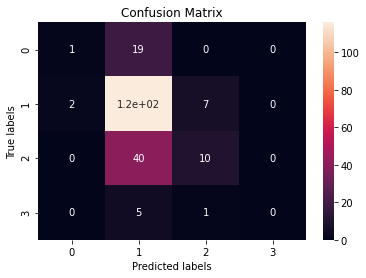

In [77]:
n_estimators = [5,10,20,50, 100, 200, 300]
md = range(3, 8)
parameters = {'n_estimators': n_estimators, 'max_depth': md}
estimator = RandomForestClassifier(random_state=17, oob_score = True)
clf = GridSearchCV(estimator, parameters, scoring='accuracy', cv=skf, n_jobs = -1)
clf.fit(X_train, y_train)
clf.best_estimator_

best = clf.best_estimator_
best.fit(X_train, y_train)
y_pred=best.predict(X_test)
preds_prob = best.predict_proba(X_test)
print(clf.best_score_)
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

Maximal score: 0.6294820717131474


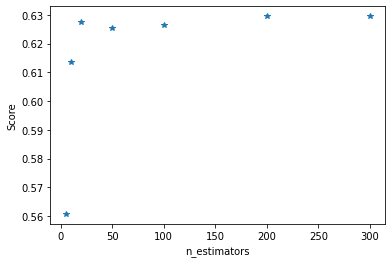

In [78]:
score = []

for n in n_estimators:
    rf = RandomForestClassifier(random_state=17, n_estimators=n, oob_score = True, max_depth=5).fit(X, y)
    score.append(rf.oob_score_)

plt.plot(n_estimators, score, "*")
plt.xlabel('n_estimators')
plt.ylabel('Score')

print(f'Maximal score: {max(score)}')

### GradientBoostingClassifier

[0.62189055 0.64179104 0.66666667 0.67164179 0.65      ]
----------------------Model performance-----------------------
Accuracy score:  0.5522388059701493
CV score: Mean - 0.6503980099502487, Max - 0.6716417910447762, Min - 0.6218905472636815, Std - 0.017904642508601194


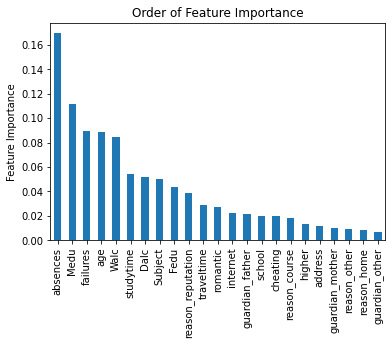

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
def GBC_model(clf):
    clf.fit(X_train, y_train)
    probab_of_predict = clf.predict_proba(X_test)
    predict_train = clf.predict(X_test)

    cv_score = cross_val_score(clf, X, y, cv = 5, scoring="accuracy")
    print(cv_score)

    print("----------------------Model performance-----------------------")
    print("Accuracy score: ", accuracy_score(y_test, predict_train))
    print("CV score: Mean - {}, Max - {}, Min - {}, Std - {}".format(np.mean(cv_score), np.max(cv_score),
                                                                     np.min(cv_score), np.std(cv_score)))

    Relative_Feature_importance = pd.Series(clf.feature_importances_, X.columns).sort_values(ascending=False)
    Relative_Feature_importance.plot(kind='bar', title='Order of Feature Importance')
    plt.ylabel('Feature Importance')
    plt.show()
clf = GradientBoostingClassifier(learning_rate =0.25,random_state=17)
GBC_model(clf)